In [1]:
%matplotlib inline 
import pandas
import numpy
import scipy
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import math
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA

In [2]:
numpy.__version__

'1.10.4'

In [3]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 14}
matplotlib.rc('font',**font)
matplotlib.rc('text.latex',unicode=True)

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',"#3598DC", "#32C5D2", "#578EBE", "#1BA39C", "#4B77BE", "#44B6AE", "#5C9BD1", "#3FABA4", "#36D7B7"]

In [4]:
data = pandas.read_excel('data.xlsx')

In [5]:
data = pandas.DataFrame(data[(data['category'] != 'ср зн 1г')])

In [6]:
data = pandas.DataFrame(data[(data['category'] != 'ср зн 2г')])

In [154]:
def filtered(data, group, low, up):
    kc = pandas.DataFrame(data[(data['group'] == group) & (data['category'] >= low) & (data['category'] <= up)])
    kc = kc[['fio','sphere','ball']].groupby(['fio','sphere']).mean()
    return kc

In [155]:
home1 = filtered(data, 'дом', 0, 11.5)
print(home1.describe())

            ball
count  86.000000
mean    0.963585
std     0.165092
min     0.363333
25%     0.882500
50%     1.000000
75%     1.065000
max     1.330000


In [156]:
home2 = filtered(data, 'дом', 11.6, 30)
print(home2.describe())

            ball
count  91.000000
mean    0.890833
std     0.138328
min     0.530000
25%     0.800000
50%     0.910000
75%     0.989583
max     1.170000


In [157]:
kz1 = filtered(data, 'кц', 0, 11.5)
print(kz1.describe())

             ball
count  136.000000
mean     0.897286
std      0.341753
min      0.000000
25%      0.776250
50%      1.000000
75%      1.085000
max      1.730000


In [158]:
kz2 = filtered(data, 'кц', 11.6, 30)
print(kz2.describe())

             ball
count  108.000000
mean     0.946188
std      0.125511
min      0.570000
25%      0.895000
50%      0.947500
75%      1.000000
max      1.555000


In [159]:
statistic, p_value = scipy.stats.mannwhitneyu(kz1['ball'], kz2['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 1 - 2 год КЦ", statistic, round(p_value,2), yes)
print('1 год', round(kz1['ball'].mean(),2),' 2 год', round(kz2['ball'].mean(),2))


Mann — Whitney 1 - 2 год КЦ 6715.5 0.12 
1 год 0.9  2 год 0.95


In [160]:
statistic, p_value = scipy.stats.mannwhitneyu(kz1['ball'], home1['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 1 год КЦ - ДОМ ", statistic, round(p_value,2), yes)
print('КЦ среднее', round(kz1['ball'].mean(),2),' Дом среднее', round(home1['ball'].mean(),2))


Mann — Whitney 1 год КЦ - ДОМ  5549.5 0.26 
КЦ среднее 0.9  Дом среднее 0.96


In [161]:
statistic, p_value = scipy.stats.mannwhitneyu(kz2['ball'], home2['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 2 год КЦ - ДОМ ", statistic, p_value, yes)
print('КЦ среднее ', round(kz2['ball'].mean(),2),' ДОМ среднее ', round(home2['ball'].mean(),2))


Mann — Whitney 2 год КЦ - ДОМ  3817.0 0.00333846696369 ***
КЦ среднее  0.95  ДОМ среднее  0.89


In [162]:
statistic, p_value = scipy.stats.mannwhitneyu(home1['ball'], home1['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 1 - 2 год ДОМ", statistic, round(p_value,2), yes)
print('1 год', round(kz1['ball'].mean(),2),' 2 год', round(kz2['ball'].mean(),2))


Mann — Whitney 1 - 2 год ДОМ 3698.0 0.5 
1 год 0.9  2 год 0.95


In [163]:
sphere = ['перцепция', 'ползание', 'речь', 'сидение', 'социальное ', 'хватание','хождение']
group1 = list()
for i in range(len(home1['ball'])):
    s = home1.ix[i]
    if s.name[1] == 'перцепция':
        group1.append(s[0])
print(group1)

[1.1900000000000002, 1.0600000000000001, 1.0600000000000001, 0.81666666666666676, 1.1000000000000001, 1.05, 0.98000000000000009, 0.75, 1.24, 1.0600000000000001, 1.115, 1.22]


In [164]:
for item in sphere:
    group1 = list()
    group2 = list()
    for i in range(len(home1['ball'])):
        s = home1.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(kz1['ball'])):
        s = kz1.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(home1[(home1['sphere'] == item)])
    #group2 = pandas.DataFrame(kz1[(kz1['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 1 год ДОМ - КЦ ", item, 'статистика',  statistic, 'p-value', round(p_value,2), yes)
    print('ДОМ среднее ', numpy.mean(group1), 'выборка %s'%len(group1), ' КЦ среднее', numpy.mean(group2), 'выборка %s'%len(group2))


Mann — Whitney 1 год ДОМ - КЦ  перцепция статистика 82.5 p-value 0.1 
ДОМ среднее  1.05347222222 выборка 12  КЦ среднее 0.86600877193 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  ползание статистика 104.5 p-value 0.23 
ДОМ среднее  1.01282051282 выборка 13  КЦ среднее 1.06969298246 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  речь статистика 92.0 p-value 0.19 
ДОМ среднее  0.757638888889 выборка 12  КЦ среднее 0.67899122807 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  сидение статистика 106.0 p-value 0.25 
ДОМ среднее  0.98641025641 выборка 13  КЦ среднее 0.964605263158 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  социальное  статистика 106.5 p-value 0.38 
ДОМ среднее  0.916527777778 выборка 12  КЦ среднее 0.88548245614 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  хватание статистика 112.0 p-value 0.47 
ДОМ среднее  0.95375 выборка 12  КЦ среднее 0.858552631579 выборка 19

Mann — Whitney 1 год ДОМ - КЦ  хождение статистика 103.0 p-value 0.33 
ДОМ среднее  1.05847222222 выборка 12  КЦ среднее 0.

In [165]:
sphere2 = ['лов кисти', 'перцепция', 'пон речи', 'речь', 'самостоятельность', 'социальное ','хождение']

In [166]:
for item in sphere2:
    group1 = list()
    group2 = list()
    for i in range(len(home2['ball'])):
        s = home2.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(kz2['ball'])):
        s = kz2.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(home2[(home2['sphere'] == item)])
    #group2 = pandas.DataFrame(kz2[(kz2['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 2 год ДОМ - КЦ ", item,'статистика ',  statistic, 'p-value ',round(p_value,2), yes)
    print('ДОМ среднее ', numpy.mean(group1), 'выборка %s'%len(group1), ' КЦ среднее', numpy.mean(group2), 'выборка %s'%len(group2))


Mann — Whitney 2 год ДОМ - КЦ  лов кисти статистика  96.0 p-value  0.47 
ДОМ среднее  0.925448717949 выборка 13  КЦ среднее 0.922333333333 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  перцепция статистика  83.0 p-value  0.25 
ДОМ среднее  0.968653846154 выборка 13  КЦ среднее 0.988333333333 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  пон речи статистика  76.5 p-value  0.17 
ДОМ среднее  0.862435897436 выборка 13  КЦ среднее 0.909666666667 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  речь статистика  63.5 p-value  0.06 
ДОМ среднее  0.757435897436 выборка 13  КЦ среднее 0.838 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  самостоятельность статистика  42.0 p-value  0.01 ***
ДОМ среднее  0.885128205128 выборка 13  КЦ среднее 1.03566666667 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  социальное  статистика  62.5 p-value  0.05 
ДОМ среднее  0.849294871795 выборка 13  КЦ среднее 0.902666666667 выборка 15

Mann — Whitney 2 год ДОМ - КЦ  хождение статистика  88.0 p-value  0.33 
ДОМ среднее  0.987435897

In [167]:
for item in sphere2:
    group1 = list()
    group2 = list()
    for i in range(len(home1['ball'])):
        s = home1.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(home2['ball'])):
        s = home2.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(home1[(home1['sphere'] == item)])
    #group2 = pandas.DataFrame(home2[(home2['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 1 - 2 год ДОМ ", item,'статистика ',  statistic, 'p-value ',round(p_value,2), yes)
    print('ДОМ 1 год среднее ', numpy.mean(group1), 'выборка %s'%len(group1),  ' ДОМ 2 год среднее', numpy.mean(group2), 'выборка %s'%len(group2), )


Mann — Whitney 1 - 2 год ДОМ  лов кисти статистика  0.0 p-value  nan 
ДОМ 1 год среднее  nan выборка 0  ДОМ 2 год среднее 0.925448717949 выборка 13

Mann — Whitney 1 - 2 год ДОМ  перцепция статистика  51.0 p-value  0.07 
ДОМ 1 год среднее  1.05347222222 выборка 12  ДОМ 2 год среднее 0.968653846154 выборка 13

Mann — Whitney 1 - 2 год ДОМ  пон речи статистика  0.0 p-value  nan 
ДОМ 1 год среднее  nan выборка 0  ДОМ 2 год среднее 0.862435897436 выборка 13

Mann — Whitney 1 - 2 год ДОМ  речь статистика  73.5 p-value  0.4 
ДОМ 1 год среднее  0.757638888889 выборка 12  ДОМ 2 год среднее 0.757435897436 выборка 13

Mann — Whitney 1 - 2 год ДОМ  самостоятельность статистика  0.0 p-value  nan 
ДОМ 1 год среднее  nan выборка 0  ДОМ 2 год среднее 0.885128205128 выборка 13

Mann — Whitney 1 - 2 год ДОМ  социальное  статистика  52.0 p-value  0.08 
ДОМ 1 год среднее  0.916527777778 выборка 12  ДОМ 2 год среднее 0.849294871795 выборка 13

Mann — Whitney 1 - 2 год ДОМ  хождение статистика  49.0 p-val

/Users/anastasiapanfilova/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [168]:
for item in sphere2:
    group1 = list()
    group2 = list()
    for i in range(len(kz1['ball'])):
        s = kz1.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(kz2['ball'])):
        s = kz2.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(kz1[(kz1['sphere'] == item)])
    #group2 = pandas.DataFrame(kz2[(kz2['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 1 - 2 год КЦ ", item,'статистика ',  statistic, 'p-value ',round(p_value,2), yes)
    print('КЦ 1 год среднее ', numpy.mean(group1), 'выборка %s'%len(group1), ' КЦ 2 год среднее', numpy.mean(group2), 'выборка %s'%len(group2),)


Mann — Whitney 1 - 2 год КЦ  лов кисти статистика  0.0 p-value  0.05 
КЦ 1 год среднее  1.05 выборка 1  КЦ 2 год среднее 0.922333333333 выборка 15

Mann — Whitney 1 - 2 год КЦ  перцепция статистика  126.0 p-value  0.28 
КЦ 1 год среднее  0.86600877193 выборка 19  КЦ 2 год среднее 0.988333333333 выборка 15

Mann — Whitney 1 - 2 год КЦ  пон речи статистика  0.0 p-value  0.05 
КЦ 1 год среднее  1.09 выборка 1  КЦ 2 год среднее 0.909666666667 выборка 15

Mann — Whitney 1 - 2 год КЦ  речь статистика  82.5 p-value  0.02 ***
КЦ 1 год среднее  0.67899122807 выборка 19  КЦ 2 год среднее 0.838 выборка 15

Mann — Whitney 1 - 2 год КЦ  самостоятельность статистика  7.0 p-value  0.46 
КЦ 1 год среднее  1.0 выборка 1  КЦ 2 год среднее 1.03566666667 выборка 15

Mann — Whitney 1 - 2 год КЦ  социальное  статистика  130.5 p-value  0.34 
КЦ 1 год среднее  0.88548245614 выборка 19  КЦ 2 год среднее 0.902666666667 выборка 15

Mann — Whitney 1 - 2 год КЦ  хождение статистика  131.0 p-value  0.34 
КЦ 1 год 

In [169]:
kg1 = filtered(data, 'кг', 0, 11.0)
print(kg1.describe())

            ball
count  49.000000
mean    1.002976
std     0.188470
min     0.330000
25%     0.895000
50%     1.000000
75%     1.096667
max     1.500000


In [170]:
kg2 = filtered(data, 'кг', 11.0, 30)
print(kg2.describe())

            ball
count  35.000000
mean    1.004571
std     0.149594
min     0.700000
25%     0.900000
50%     0.970000
75%     1.070000
max     1.420000


In [171]:
pat = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] >= 0) & (data['category'] <= 11.5)])
pat = pat[['fio','sphere','ball']].groupby(['fio','sphere']).mean()
#pat = pandas.DataFrame(data[((data['group'] == 'кц') | (data['group'] == 'дом')) & (data['category'] == 'ср зн 1г')])
describe = pat['ball'].describe()
print(describe)

count    222.000000
mean       0.922969
std        0.287882
min        0.000000
25%        0.830833
50%        1.000000
75%        1.081875
max        1.730000
Name: ball, dtype: float64


In [172]:
statistic, p_value = scipy.stats.mannwhitneyu(pat['ball'], kg1['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 1 год патология (дом, кц) и кг", statistic, round(p_value,2), yes)
print('Патология', round(pat['ball'].mean(),2),' КГ', round(kg1['ball'].mean(),2))


Mann — Whitney 1 год патология (дом, кц) и кг 4558.5 0.04 ***
Патология 0.92  КГ 1.0


In [173]:
for item in sphere:
    group1 = list()
    group2 = list()
    for i in range(len(kg1['ball'])):
        s = kg1.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(pat['ball'])):
        s = pat.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(kg1[(kg1['sphere'] == item)])
    #group2 = pandas.DataFrame(pat[(pat['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 1 год Патология - КГ ", item,'статистика ',  statistic, 'p-value ',round(p_value,2), yes)
    print('КГ 1 год среднее ', numpy.mean(group1), 'выборка %s'%len(group1), ' Патология 1 год среднее', numpy.mean(group2), 'выборка %s'%len(group2))


Mann — Whitney 1 год Патология - КГ  перцепция статистика  81.0 p-value  0.15 
КГ 1 год среднее  1.1055952381 выборка 7  Патология 1 год среднее 0.938575268817 выборка 31

Mann — Whitney 1 год Патология - КГ  ползание статистика  76.5 p-value  0.09 
КГ 1 год среднее  1.13261904762 выборка 7  Патология 1 год среднее 1.04658854167 выборка 32

Mann — Whitney 1 год Патология - КГ  речь статистика  60.0 p-value  0.03 ***
КГ 1 год среднее  0.8725 выборка 7  Патология 1 год среднее 0.709435483871 выборка 31

Mann — Whitney 1 год Патология - КГ  сидение статистика  101.0 p-value  0.34 
КГ 1 год среднее  0.973452380952 выборка 7  Патология 1 год среднее 0.973463541667 выборка 32

Mann — Whitney 1 год Патология - КГ  социальное  статистика  77.5 p-value  0.12 
КГ 1 год среднее  0.959523809524 выборка 7  Патология 1 год среднее 0.8975 выборка 31

Mann — Whitney 1 год Патология - КГ  хватание статистика  99.0 p-value  0.36 
КГ 1 год среднее  0.96130952381 выборка 7  Патология 1 год среднее 0.8954

In [174]:
pat2 = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] >= 11.6) & (data['category'] <= 30)])
pat2 = pat2[['fio','sphere','ball']].groupby(['fio','sphere']).mean()
#pat = pandas.DataFrame(data[((data['group'] == 'кц') | (data['group'] == 'дом')) & (data['category'] == 'ср зн 1г')])
describe = pat['ball'].describe()
print(describe)

count    222.000000
mean       0.922969
std        0.287882
min        0.000000
25%        0.830833
50%        1.000000
75%        1.081875
max        1.730000
Name: ball, dtype: float64


In [175]:
for item in sphere2:
    group1 = list()
    group2 = list()
    for i in range(len(kg2['ball'])):
        s = kg2.ix[i]
        if s.name[1] == item:
            group1.append(s[0])
    for i in range(len(pat2['ball'])):
        s = pat2.ix[i]
        if s.name[1] == item:
            group2.append(s[0])
    #group1 = pandas.DataFrame(kg1[(kg1['sphere'] == item)])
    #group2 = pandas.DataFrame(pat[(pat['sphere'] == item)])
    statistic, p_value = scipy.stats.mannwhitneyu(group1, group2, use_continuity=False)
    if p_value < 0.05:
        yes = "***"
    else: yes = ""
    print("\nMann — Whitney 1 год Патология - КГ ", item,'статистика ',  statistic, 'p-value ',round(p_value,2), yes)
    print('КГ 2 год среднее ', numpy.mean(group1), 'выборка %s'%len(group1), ' Патология 2 год среднее', numpy.mean(group2), 'выборка %s'%len(group2))


Mann — Whitney 1 год Патология - КГ  лов кисти статистика  40.0 p-value  0.07 
КГ 2 год среднее  0.98 выборка 5  Патология 2 год среднее 0.923779761905 выборка 28

Mann — Whitney 1 год Патология - КГ  перцепция статистика  52.5 p-value  0.19 
КГ 2 год среднее  1.016 выборка 5  Патология 2 год среднее 0.979196428571 выборка 28

Mann — Whitney 1 год Патология - КГ  пон речи статистика  37.5 p-value  0.05 
КГ 2 год среднее  1.068 выборка 5  Патология 2 год среднее 0.887738095238 выборка 28

Mann — Whitney 1 год Патология - КГ  речь статистика  39.0 p-value  0.06 
КГ 2 год среднее  1.008 выборка 5  Патология 2 год среднее 0.800595238095 выборка 28

Mann — Whitney 1 год Патология - КГ  самостоятельность статистика  52.0 p-value  0.18 
КГ 2 год среднее  1.0 выборка 5  Патология 2 год среднее 0.965773809524 выборка 28

Mann — Whitney 1 год Патология - КГ  социальное  статистика  45.5 p-value  0.11 
КГ 2 год среднее  0.952 выборка 5  Патология 2 год среднее 0.877886904762 выборка 28

Mann — W

In [176]:
statistic, p_value = scipy.stats.mannwhitneyu(pat2['ball'], kg2['ball'], use_continuity=False)
if p_value < 0.05:
    yes = "***"
else: yes = ""
print("\nMann — Whitney 1 год патология (дом, кц) и кг", statistic, round(p_value,2), yes)
print('Патология', round(pat2['ball'].mean(),2),' КГ', round(kg2['ball'].mean(),2))


Mann — Whitney 1 год патология (дом, кц) и кг 2527.5 0.0 ***
Патология 0.92  КГ 1.0


In [248]:
def fil(data):
    up = [0,6,12,18,24]
    l_max = list()
    l_min = list()
    l = {}
    for i in range(1,6):
        k = list()
        if i ==5:
            kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] > up[i-1])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1])])
        else:
            kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
        kc1 = kc[['fio','sphere','ball']].groupby(['fio']).max()
        i = 0;
        for item in kc1.iterrows():
            #print(item[0], item[1]['sphere'])
            sphere = kc[(kc['ball'] == item[1]['ball']) & (kc['fio'] == item[0])]
            #print(sphere)
            sf = ''
            for q in sphere.iterrows():
                #print(q[1]['sphere'])
                sf = sf + q[1]['sphere'][:3] + ';'
            kc1.set_value(item[0], 'sphere', sf)
            #kc.loc[(kc['ball'] == item['ball']) & (kc['fio'] == item['fio'])]['sphere']
            i = i + 1
        l_max.append(kc1)
        kc2 = kc[['fio','sphere','ball']].groupby(['fio']).min()
        i = 0;
        for item in kc2.iterrows():
            #print(item[0], item[1]['sphere'])
            sphere = kc[(kc['ball'] == item[1]['ball']) & (kc['fio'] == item[0])]
            #print(sphere)
            sf = ''
            for q in sphere.iterrows():
                #print(q[1]['sphere'])
                sf = sf + q[1]['sphere'][:3] + ';'
            kc2.set_value(item[0], 'sphere', sf)
            #kc.loc[(kc['ball'] == item['ball']) & (kc['fio'] == item['fio'])]['sphere']
            i = i + 1
        l_min.append(kc2)
    l['max'] = l_max
    l['min'] = l_min
    return l
d = fil(data)
print(d)

{'max': [                              sphere  ball
fio                                       
Алексеев                пол;сид;хва;  1.00
Артёмова                        пер;  1.33
Афонина                     сид;хож;  1.25
Бочаров                         пол;  1.25
Венецкий            сид;хож;хва;пер;  1.00
Востряков       пол;сид;хож;хва;пер;  1.00
Горват                      пер;соц;  1.50
Кафитулина                      пер;  1.50
Колесова                        пол;  1.00
Крыков                  пол;сид;хва;  1.00
Лихачев                         сид;  0.92
Лихачёв                         хож;  1.00
Матушкин                    сид;хож;  1.00
Ростенко                        пол;  1.75
Савельева                       пер;  1.50
Соловьёва                       хож;  1.50
Худайберганова          сид;хва;соц;  1.00,                        sphere  ball
fio                                
Аляев                    пол;  1.33
Артёмова             сид;пер;  1.29
Афонина                  пол;

In [249]:
s = list()
fam = {}
for i in range(5):
    fio = list()
    for item in d['min'][i].iterrows():
        res = {}
        fam[item[0]] = 1
        #print(item[0],item[1]['sphere'],item[1]['ball'])
        res['fio'],res['sphere_min'],res['ball_min'] = item[0],item[1]['sphere'],item[1]['ball']
        l = d['max'][i].index == item[0]
        #print(l)
        k = numpy.where(l == True)
        #print(k[0])
        m = d['max'][i].ix[k[0]]
        #print(m.index, m['sphere'], m['ball'])
        res['sphere_max'],res['ball_max'] = m['sphere'][0], float("{0:.2f}".format(m['ball'][0]))
        #print('РАЗНОСТЬ', m['ball'] - item[1]['ball'])
        t = m['ball'] - item[1]['ball']
        res['diff'] = float("{0:.2f}".format(t[0]))
        fio.append(res)
    s.append(fio)
print(s)
        

[[{'ball_max': 1.0, 'diff': 0.75, 'fio': 'Алексеев', 'sphere_max': 'пол;сид;хва;', 'sphere_min': 'пер;', 'ball_min': 0.25}, {'ball_max': 1.33, 'diff': 0.44, 'fio': 'Артёмова', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.89}, {'ball_max': 1.25, 'diff': 0.75, 'fio': 'Афонина', 'sphere_max': 'сид;хож;', 'sphere_min': 'сид;реч;соц;соц;', 'ball_min': 0.5}, {'ball_max': 1.25, 'diff': 1.0, 'fio': 'Бочаров', 'sphere_max': 'пол;', 'sphere_min': 'пер;', 'ball_min': 0.25}, {'ball_max': 1.0, 'diff': 0.4, 'fio': 'Венецкий ', 'sphere_max': 'сид;хож;хва;пер;', 'sphere_min': 'соц;', 'ball_min': 0.6}, {'ball_max': 1.0, 'diff': 0.33, 'fio': 'Востряков', 'sphere_max': 'пол;сид;хож;хва;пер;', 'sphere_min': 'реч;соц;', 'ball_min': 0.67}, {'ball_max': 1.5, 'diff': 1.0, 'fio': 'Горват', 'sphere_max': 'пер;соц;', 'sphere_min': 'сид;хож;реч;', 'ball_min': 0.5}, {'ball_max': 1.5, 'diff': 1.5, 'fio': 'Кафитулина', 'sphere_max': 'пер;', 'sphere_min': 'хва;', 'ball_min': 0.0}, {'ball_max': 1.0, 'diff

In [211]:
maximum = [s[0]['fio' == 'Лихачёв']['ball_max'],s[1]['fio' == 'Лихачёв']['ball_max'],s[2]['fio' == 'Лихачёв']['ball_max'],s[3]['fio' == 'Лихачёв']['ball_max'],s[4]['fio' == 'Лихачёв']['ball_max']]
minimum = [s[0]['fio' == 'Лихачёв']['ball_min'],s[1]['fio' == 'Лихачёв']['ball_min'],s[2]['fio' == 'Лихачёв']['ball_min'],s[3]['fio' == 'Лихачёв']['ball_min'],s[4]['fio' == 'Лихачёв']['ball_min']]
print(maximum)
print(minimum)

[1.0, 1.33, 1.11, 1.09, 1.0]
[0.25, 0.89, 0.93, 0.86, 0.92]


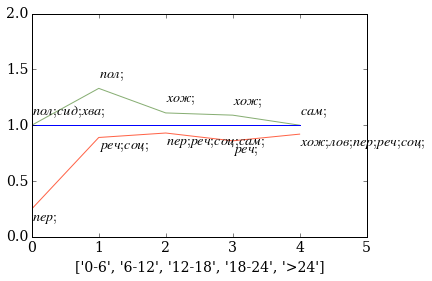

In [212]:
fig, ax = plt.subplots()
ax.plot(range(5), maximum, color='sage')
ax.plot(range(5), minimum, color = 'tomato')
ax.plot(range(5), [1,1,1,1,1])
ax.set_ylim((0, 2))
ax.set_xlim((0, 5))
ax.set_xlabel(['0-6', '6-12','12-18', '18-24', '>24'])
for i in range(5):
    ax.annotate('$%s$'%s[i]['fio' == 'Лихачев']['sphere_max'], xy=(i, s[i]['fio' == 'Лихачев']['ball_max']+0.1), xytext=(i, s[i]['fio' == 'Лихачев']['ball_max']+0.1))
    ax.annotate('$%s$'%s[i]['fio' == 'Лихачев']['sphere_min'], xy=(i, s[i]['fio' == 'Лихачев']['ball_min']-0.1), xytext=(i, s[i]['fio' == 'Лихачев']['ball_min']-0.1))
plt.show()

Лихачев
{'ball_max': 0.92, 'diff': 0.09, 'fio': 'Лихачев', 'sphere_max': 'сид;', 'sphere_min': 'пол;', 'ball_min': 0.83}


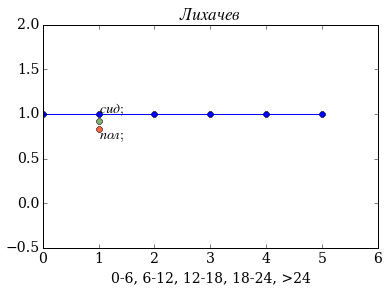

Венецкий 
{'ball_max': 1.0, 'diff': 0.4, 'fio': 'Венецкий ', 'sphere_max': 'сид;хож;хва;пер;', 'sphere_min': 'соц;', 'ball_min': 0.6}
{'ball_max': 1.27, 'diff': 0.47, 'fio': 'Венецкий ', 'sphere_max': 'пол;', 'sphere_min': 'пер;', 'ball_min': 0.8}


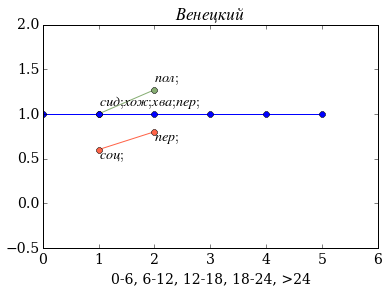

Матушкин
{'ball_max': 1.0, 'diff': 0.25, 'fio': 'Матушкин', 'sphere_max': 'сид;хож;', 'sphere_min': 'пол;пер;соц;', 'ball_min': 0.75}


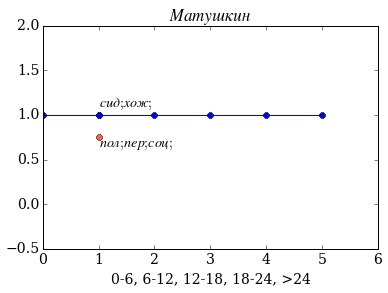

Ивлиев
{'ball_max': 1.06, 'diff': 0.47, 'fio': 'Ивлиев', 'sphere_max': 'пол;хож;пер;', 'sphere_min': 'реч;', 'ball_min': 0.59}


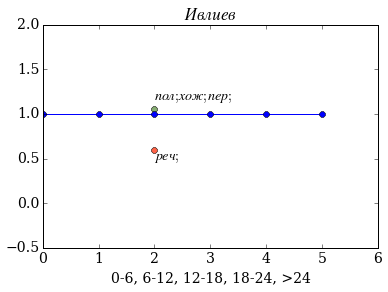

Лыгина
{'ball_max': 1.61, 'diff': 0.78, 'fio': 'Лыгина', 'sphere_max': 'сам;', 'sphere_min': 'реч;реч;', 'ball_min': 0.83}


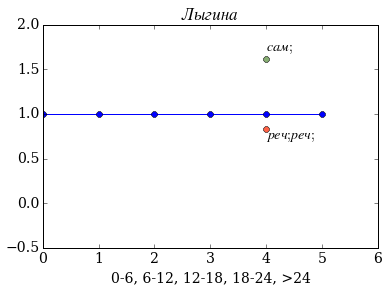

Ростенко 
{'ball_max': 1.75, 'diff': 1.75, 'fio': 'Ростенко ', 'sphere_max': 'пол;', 'sphere_min': 'сид;', 'ball_min': 0.0}
{'ball_max': 1.22, 'diff': 0.33, 'fio': 'Ростенко ', 'sphere_max': 'хож;пер;', 'sphere_min': 'соц;', 'ball_min': 0.89}
{'ball_max': 1.12, 'diff': 0.27, 'fio': 'Ростенко ', 'sphere_max': 'хож;пер;', 'sphere_min': 'реч;сам;', 'ball_min': 0.85}


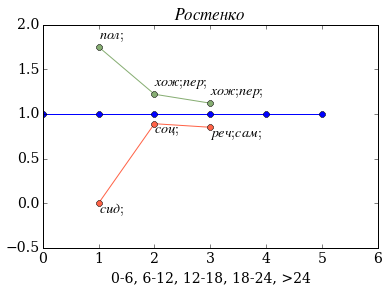

Воробьёва 
{'ball_max': 1.2, 'diff': 0.53, 'fio': 'Воробьёва ', 'sphere_max': 'пол;сид;хож;', 'sphere_min': 'реч;', 'ball_min': 0.67}


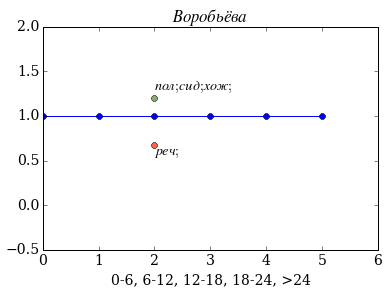

Бочаров
{'ball_max': 1.25, 'diff': 1.0, 'fio': 'Бочаров', 'sphere_max': 'пол;', 'sphere_min': 'пер;', 'ball_min': 0.25}


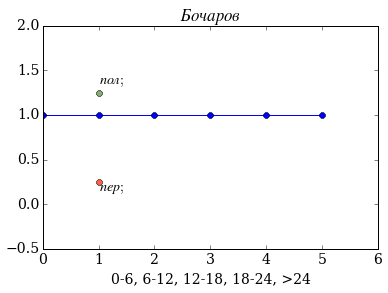

Казаков
{'ball_max': 1.08, 'diff': 0.16, 'fio': 'Казаков', 'sphere_max': 'хож;пон;сам;', 'sphere_min': 'соц;', 'ball_min': 0.92}


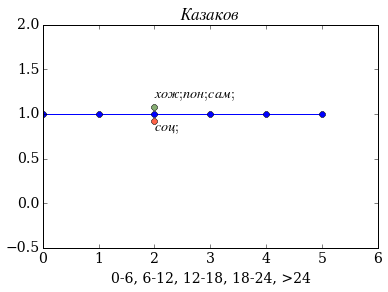

Медведев
{'ball_max': 1.05, 'diff': 0.48, 'fio': 'Медведев', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.57}


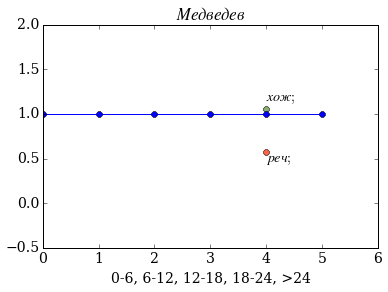

Курильников
{'ball_max': 1.15, 'diff': 0.2, 'fio': 'Курильников', 'sphere_max': 'хож;', 'sphere_min': 'хва;', 'ball_min': 0.95}
{'ball_max': 1.0, 'diff': 0.12, 'fio': 'Курильников', 'sphere_max': 'реч;', 'sphere_min': 'пер;соц;сам;', 'ball_min': 0.88}


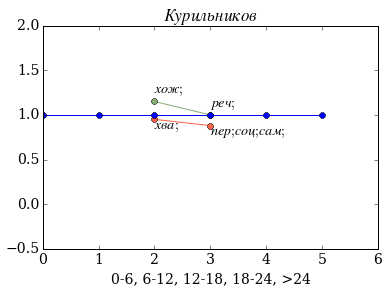

Атикова
{'ball_max': 0.88, 'diff': 0.23, 'fio': 'Атикова', 'sphere_max': 'пер;сам;', 'sphere_min': 'хож;', 'ball_min': 0.65}


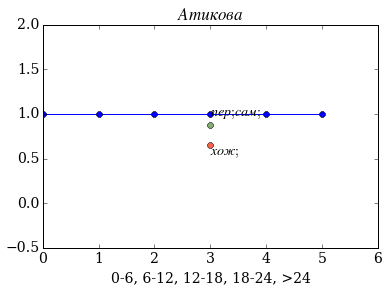

Худайберганова
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Худайберганова', 'sphere_max': 'сид;хва;соц;', 'sphere_min': 'пер;', 'ball_min': 0.0}


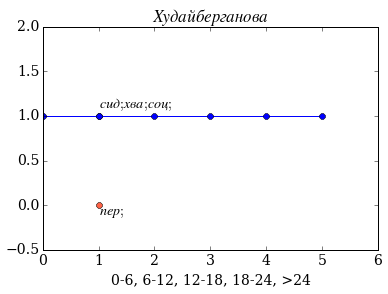

Алексеев
{'ball_max': 1.0, 'diff': 0.75, 'fio': 'Алексеев', 'sphere_max': 'пол;сид;хва;', 'sphere_min': 'пер;', 'ball_min': 0.25}


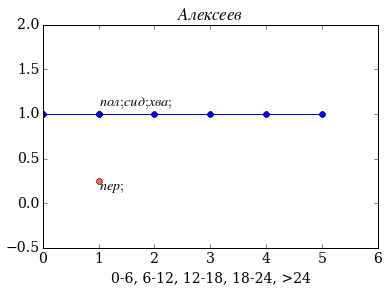

Бондарьков
{'ball_max': 1.02, 'diff': 0.42, 'fio': 'Бондарьков', 'sphere_max': 'хож;', 'sphere_min': 'пон;', 'ball_min': 0.6}


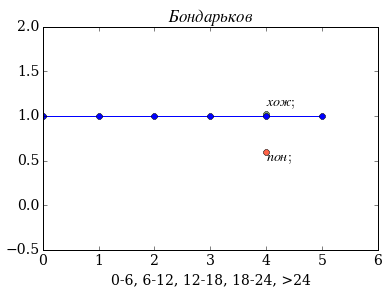

Зайцев
{'ball_max': 1.13, 'diff': 0.13, 'fio': 'Зайцев', 'sphere_max': 'пол;сид;хож;пер;', 'sphere_min': 'хва;реч;соц;', 'ball_min': 1.0}


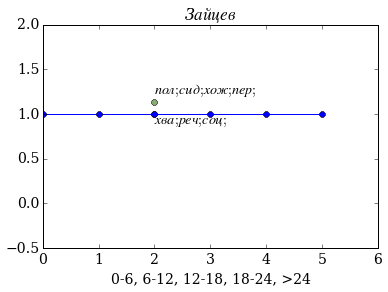

Макаров
{'ball_max': 1.33, 'diff': 0.55, 'fio': 'Макаров', 'sphere_max': 'сид;', 'sphere_min': 'реч;', 'ball_min': 0.78}


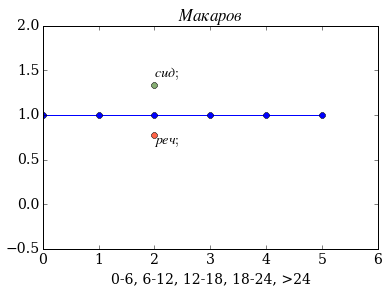

Востряков
{'ball_max': 1.0, 'diff': 0.33, 'fio': 'Востряков', 'sphere_max': 'пол;сид;хож;хва;пер;', 'sphere_min': 'реч;соц;', 'ball_min': 0.67}


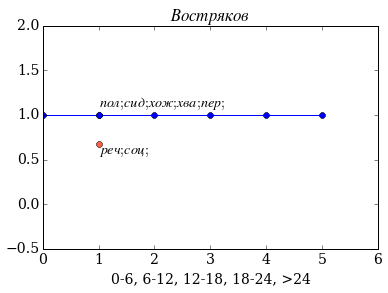

Сажко
{'ball_max': 1.08, 'diff': 0.36, 'fio': 'Сажко', 'sphere_max': 'хож;', 'sphere_min': 'реч;соц;', 'ball_min': 0.72}


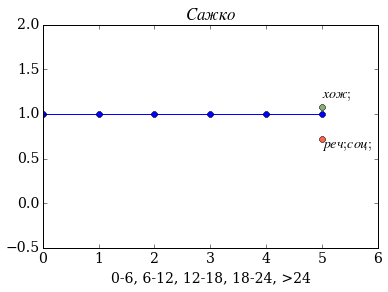

Орлов
{'ball_max': 0.96, 'diff': 0.39, 'fio': 'Орлов', 'sphere_max': 'хож;пер;', 'sphere_min': 'реч;пон;', 'ball_min': 0.57}


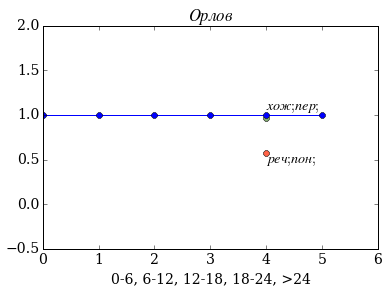

Савельева
{'ball_max': 1.5, 'diff': 1.5, 'fio': 'Савельева', 'sphere_max': 'пер;', 'sphere_min': 'сид;', 'ball_min': 0.0}
{'ball_max': 1.25, 'diff': 0.37, 'fio': 'Савельева', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.88}


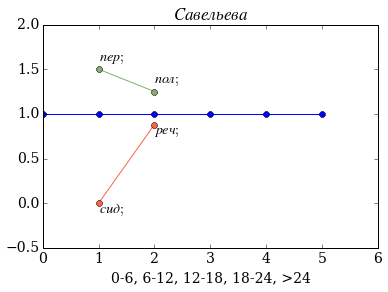

Козлов
{'ball_max': 1.23, 'diff': 0.35, 'fio': 'Козлов', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.88}
{'ball_max': 1.0, 'diff': 0.29, 'fio': 'Козлов', 'sphere_max': 'хож;лов;пер;соц;', 'sphere_min': 'реч;', 'ball_min': 0.71}
{'ball_max': 1.0, 'diff': 0.14, 'fio': 'Козлов', 'sphere_max': 'лов;пер;', 'sphere_min': 'реч;пон;соц;', 'ball_min': 0.86}


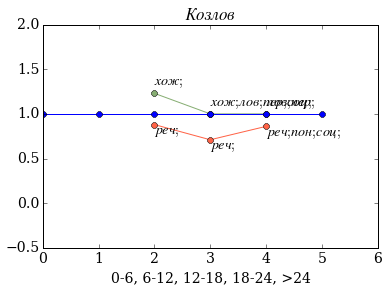

Коровин
{'ball_max': 1.1, 'diff': 0.32, 'fio': 'Коровин', 'sphere_max': 'пол;хож;соц;', 'sphere_min': 'реч;', 'ball_min': 0.78}


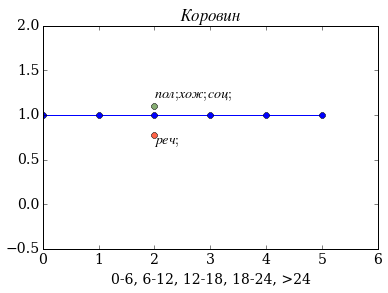

Казакова Д
{'ball_max': 1.08, 'diff': 0.33, 'fio': 'Казакова Д', 'sphere_max': 'сам;', 'sphere_min': 'лов;', 'ball_min': 0.75}


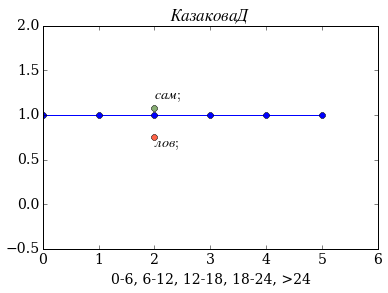

Крыков
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Крыков', 'sphere_max': 'пол;сид;хва;', 'sphere_min': 'сид;реч;', 'ball_min': 0.0}
{'ball_max': 1.05, 'diff': 0.63, 'fio': 'Крыков', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.42}


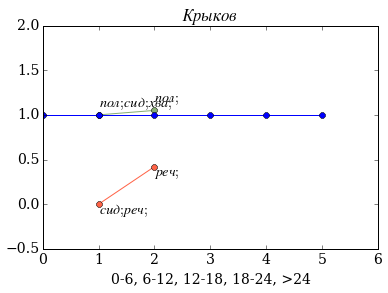

Чапарина 
{'ball_max': 1.07, 'diff': 0.14, 'fio': 'Чапарина ', 'sphere_max': 'хож;пер;сам;', 'sphere_min': 'лов;реч;пон;соц;', 'ball_min': 0.93}


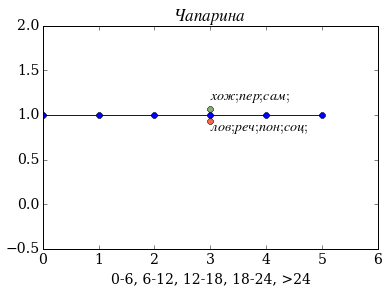

Давыдов С
{'ball_max': 1.07, 'diff': 0.34, 'fio': 'Давыдов С', 'sphere_max': 'хож;', 'sphere_min': 'сам;', 'ball_min': 0.73}
{'ball_max': 1.0, 'diff': 0.21, 'fio': 'Давыдов С', 'sphere_max': 'пер;сам;', 'sphere_min': 'реч;соц;', 'ball_min': 0.79}


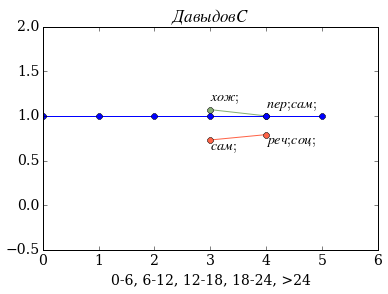

Лихачёв
{'ball_max': 1.0, 'diff': 0.33, 'fio': 'Лихачёв', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.67}
{'ball_max': 1.18, 'diff': 0.47, 'fio': 'Лихачёв', 'sphere_max': 'сид;хож;', 'sphere_min': 'реч;', 'ball_min': 0.71}
{'ball_max': 1.22, 'diff': 0.61, 'fio': 'Лихачёв', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.61}
{'ball_max': 1.14, 'diff': 0.52, 'fio': 'Лихачёв', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.62}
{'ball_max': 1.06, 'diff': 0.41, 'fio': 'Лихачёв', 'sphere_max': 'лов;', 'sphere_min': 'реч;', 'ball_min': 0.65}


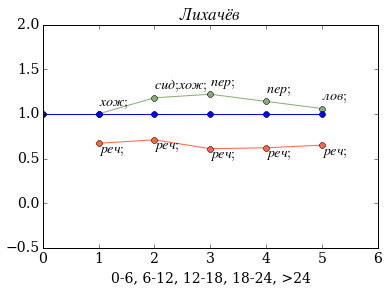

Афонина
{'ball_max': 1.25, 'diff': 0.75, 'fio': 'Афонина', 'sphere_max': 'сид;хож;', 'sphere_min': 'сид;реч;соц;соц;', 'ball_min': 0.5}
{'ball_max': 1.33, 'diff': 0.66, 'fio': 'Афонина', 'sphere_max': 'пол;', 'sphere_min': 'реч;соц;', 'ball_min': 0.67}
{'ball_max': 1.27, 'diff': 0.6, 'fio': 'Афонина', 'sphere_max': 'сам;', 'sphere_min': 'реч;', 'ball_min': 0.67}


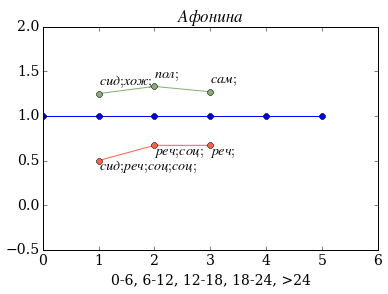

Колесова 
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Колесова ', 'sphere_max': 'пол;', 'sphere_min': 'сид;хож;хва;пер;реч;соц;', 'ball_min': 0.0}


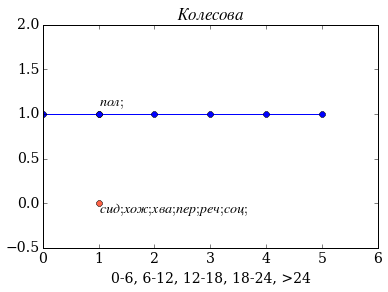

Сенцов
{'ball_max': 1.06, 'diff': 0.28, 'fio': 'Сенцов', 'sphere_max': 'пер;', 'sphere_min': 'пол;реч;', 'ball_min': 0.78}
{'ball_max': 1.06, 'diff': 0.32, 'fio': 'Сенцов', 'sphere_max': 'хож;', 'sphere_min': 'реч;сам;', 'ball_min': 0.74}


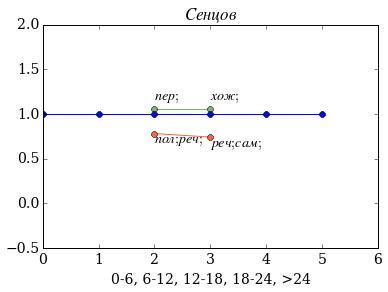

Лебеденко
{'ball_max': 1.1, 'diff': 0.2, 'fio': 'Лебеденко', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;', 'ball_min': 0.9}


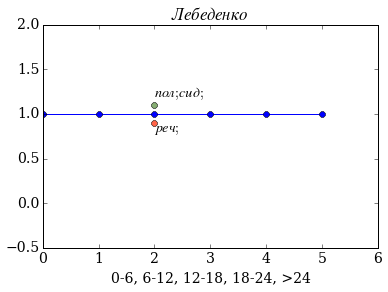

Артёмова
{'ball_max': 1.33, 'diff': 0.44, 'fio': 'Артёмова', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.89}
{'ball_max': 1.29, 'diff': 0.47, 'fio': 'Артёмова', 'sphere_max': 'сид;пер;', 'sphere_min': 'реч;', 'ball_min': 0.82}


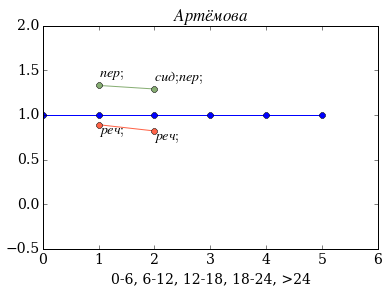

Сухотерина
{'ball_max': 1.04, 'diff': 0.29, 'fio': 'Сухотерина', 'sphere_max': 'хож;сам;', 'sphere_min': 'реч;', 'ball_min': 0.75}


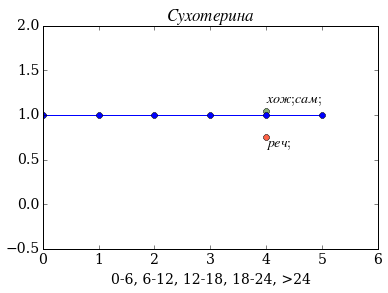

Кобелев
{'ball_max': 1.09, 'diff': 0.22, 'fio': 'Кобелев', 'sphere_max': 'лов;', 'sphere_min': 'соц;', 'ball_min': 0.87}


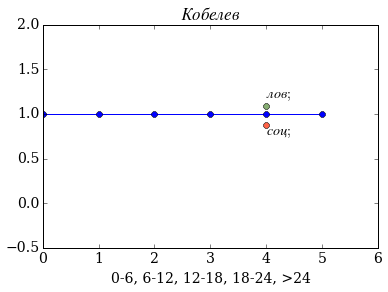

Иванова
{'ball_max': 1.0, 'diff': 0.15, 'fio': 'Иванова', 'sphere_max': 'пер;пон;', 'sphere_min': 'хож;лов;', 'ball_min': 0.85}


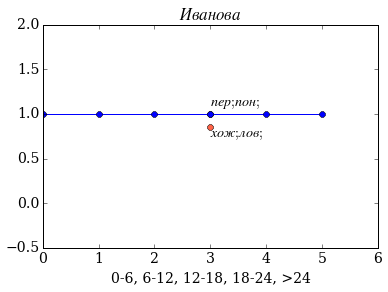

Степанов
{'ball_max': 1.73, 'diff': 0.91, 'fio': 'Степанов', 'sphere_max': 'соц;', 'sphere_min': 'реч;', 'ball_min': 0.82}


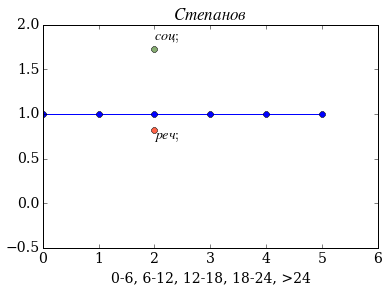

Горват
{'ball_max': 1.5, 'diff': 1.0, 'fio': 'Горват', 'sphere_max': 'пер;соц;', 'sphere_min': 'сид;хож;реч;', 'ball_min': 0.5}


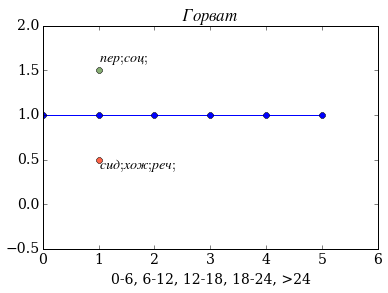

Давыдов Д
{'ball_max': 1.29, 'diff': 0.82, 'fio': 'Давыдов Д', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.47}


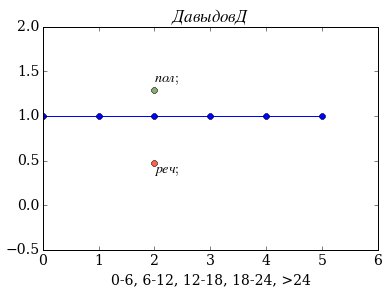

Козлова
{'ball_max': 1.12, 'diff': 0.41, 'fio': 'Козлова', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.71}


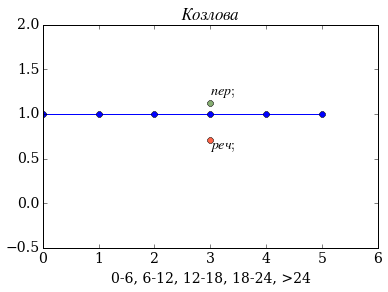

Смольянинов
{'ball_max': 1.14, 'diff': 0.71, 'fio': 'Смольянинов', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.43}


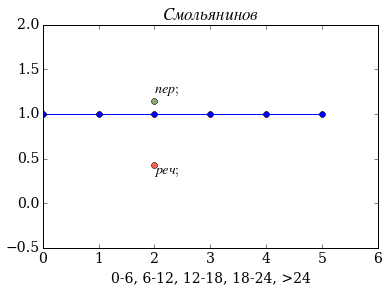

Брусников
{'ball_max': 1.08, 'diff': 0.62, 'fio': 'Брусников', 'sphere_max': 'сид;', 'sphere_min': 'соц;', 'ball_min': 0.46}
{'ball_max': 1.0, 'diff': 0.42, 'fio': 'Брусников', 'sphere_max': 'хож;', 'sphere_min': 'реч;пон;', 'ball_min': 0.58}


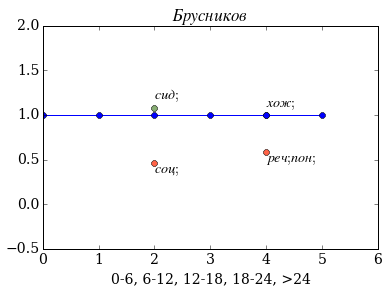

Кафитулина
{'ball_max': 1.5, 'diff': 1.5, 'fio': 'Кафитулина', 'sphere_max': 'пер;', 'sphere_min': 'хва;', 'ball_min': 0.0}


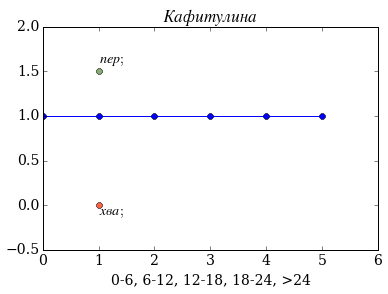

Березнев
{'ball_max': 1.17, 'diff': 0.28, 'fio': 'Березнев', 'sphere_max': 'лов;пер;', 'sphere_min': 'реч;', 'ball_min': 0.89}


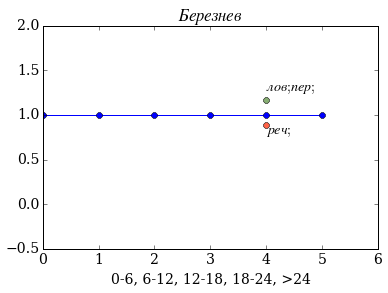

Дорофеева
{'ball_max': 1.12, 'diff': 0.29, 'fio': 'Дорофеева', 'sphere_max': 'сам;', 'sphere_min': 'реч;', 'ball_min': 0.83}
{'ball_max': 1.0, 'diff': 0.08, 'fio': 'Дорофеева', 'sphere_max': 'сам;', 'sphere_min': 'хож;лов;пер;реч;соц;', 'ball_min': 0.92}


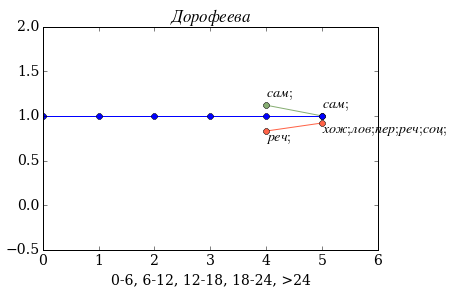

Торжков
{'ball_max': 1.33, 'diff': 0.77, 'fio': 'Торжков', 'sphere_max': 'пол;хож;', 'sphere_min': 'реч;', 'ball_min': 0.56}


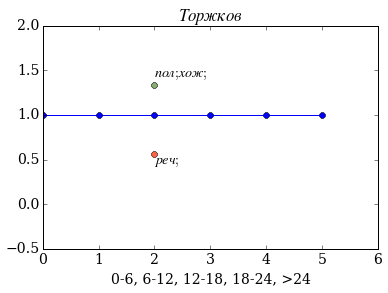

Иванов
{'ball_max': 1.17, 'diff': 0.64, 'fio': 'Иванов', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.53}


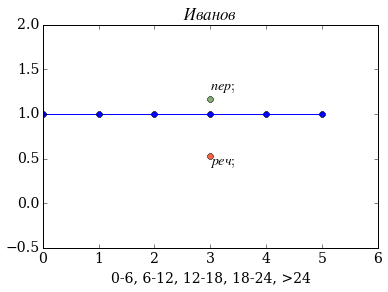

Аляев
{'ball_max': 1.33, 'diff': 0.44, 'fio': 'Аляев', 'sphere_max': 'пол;', 'sphere_min': 'реч;соц;', 'ball_min': 0.89}
{'ball_max': 1.11, 'diff': 0.18, 'fio': 'Аляев', 'sphere_max': 'хож;', 'sphere_min': 'пер;реч;соц;сам;', 'ball_min': 0.93}
{'ball_max': 1.09, 'diff': 0.23, 'fio': 'Аляев', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.86}


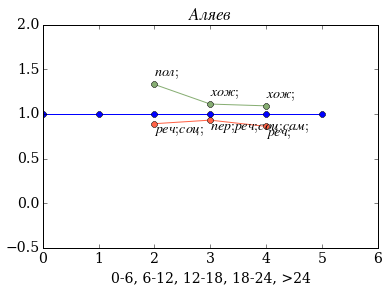

Соловьёва
{'ball_max': 1.5, 'diff': 0.5, 'fio': 'Соловьёва', 'sphere_max': 'хож;', 'sphere_min': 'пол;реч;соц;', 'ball_min': 1.0}


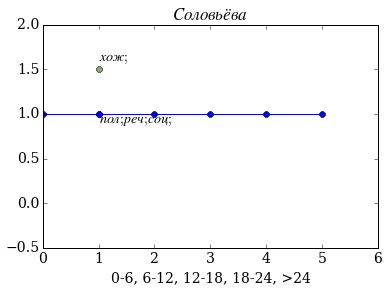

Усенко
{'ball_max': 1.02, 'diff': 0.26, 'fio': 'Усенко', 'sphere_max': 'лов;', 'sphere_min': 'реч;', 'ball_min': 0.76}


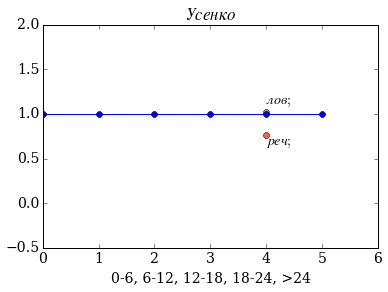

In [252]:
for item in fam:
    print(item)
    list_max = list()
    list_min = list()
    sphere_max = list()
    sphere_min = list()
    list_max.append(None)
    list_min.append(None)
    sphere_max.append(None)
    sphere_min.append(None)
    for k in range(5):
        i = 0;
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                i = i + 1;
                list_max.append(t['ball_max'])
                list_min.append(t['ball_min'])
                sphere_max.append(t['sphere_max'])
                sphere_min.append(t['sphere_min'])
        if i == 0:
            list_max.append(None)
            list_min.append(None)
            sphere_max.append(None)
            sphere_min.append(None)
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(list_max)), list_max, color='sage', marker="8")
    ax.plot(range(len(list_max)), list_min, color = 'tomato', marker="8")
    ax.plot(range(len(list_max)), [1 for i in range(len(list_max))], marker="8")
    ax.set_ylim((-0.5, 2))
    ax.set_xlim((0, 6))
    ax.set_xlabel('0-6, 6-12, 12-18, 18-24, >24')
    for sp in range(len(list_max)):
        if sphere_max[sp] != None:
            ax.annotate('$%s$'%sphere_max[sp], xy=(sp, list_max[sp]+0.1), xytext=(sp, list_max[sp]+0.1))
        if sphere_min[sp] != None:
            ax.annotate('$%s$'%sphere_min[sp], xy=(sp, list_min[sp]-0.1), xytext=(sp, list_min[sp]-0.1))
    plt.savefig('pat_%s.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()
    

Лихачев
{'ball_max': 0.92, 'diff': 0.09, 'fio': 'Лихачев', 'sphere_max': 'сид;', 'sphere_min': 'пол;', 'ball_min': 0.83}


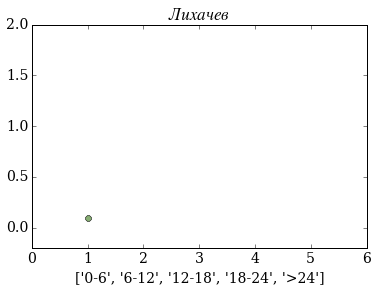

Венецкий 
{'ball_max': 1.0, 'diff': 0.4, 'fio': 'Венецкий ', 'sphere_max': 'сид;хож;хва;пер;', 'sphere_min': 'соц;', 'ball_min': 0.6}
{'ball_max': 1.27, 'diff': 0.47, 'fio': 'Венецкий ', 'sphere_max': 'пол;', 'sphere_min': 'пер;', 'ball_min': 0.8}


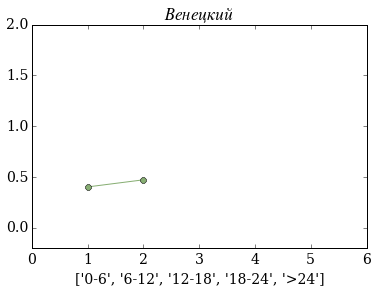

Матушкин
{'ball_max': 1.0, 'diff': 0.25, 'fio': 'Матушкин', 'sphere_max': 'сид;хож;', 'sphere_min': 'пол;пер;соц;', 'ball_min': 0.75}


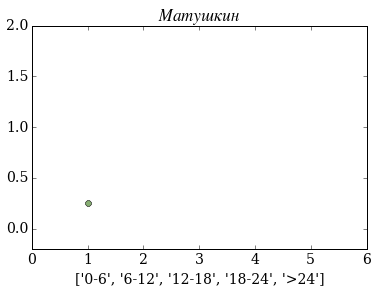

Ивлиев
{'ball_max': 1.06, 'diff': 0.47, 'fio': 'Ивлиев', 'sphere_max': 'пол;хож;пер;', 'sphere_min': 'реч;', 'ball_min': 0.59}


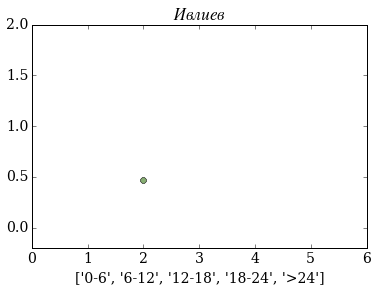

Лыгина
{'ball_max': 1.61, 'diff': 0.78, 'fio': 'Лыгина', 'sphere_max': 'сам;', 'sphere_min': 'реч;реч;', 'ball_min': 0.83}


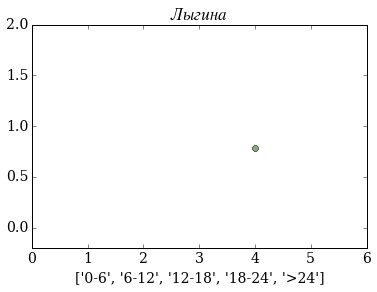

Ростенко 
{'ball_max': 1.75, 'diff': 1.75, 'fio': 'Ростенко ', 'sphere_max': 'пол;', 'sphere_min': 'сид;', 'ball_min': 0.0}
{'ball_max': 1.22, 'diff': 0.33, 'fio': 'Ростенко ', 'sphere_max': 'хож;пер;', 'sphere_min': 'соц;', 'ball_min': 0.89}
{'ball_max': 1.12, 'diff': 0.27, 'fio': 'Ростенко ', 'sphere_max': 'хож;пер;', 'sphere_min': 'реч;сам;', 'ball_min': 0.85}


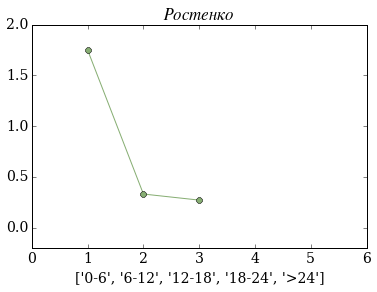

Воробьёва 
{'ball_max': 1.2, 'diff': 0.53, 'fio': 'Воробьёва ', 'sphere_max': 'пол;сид;хож;', 'sphere_min': 'реч;', 'ball_min': 0.67}


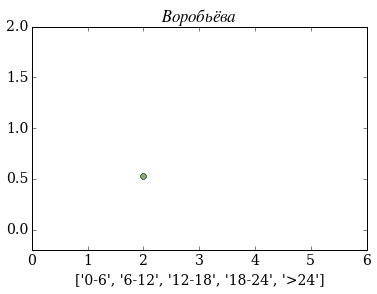

Бочаров
{'ball_max': 1.25, 'diff': 1.0, 'fio': 'Бочаров', 'sphere_max': 'пол;', 'sphere_min': 'пер;', 'ball_min': 0.25}


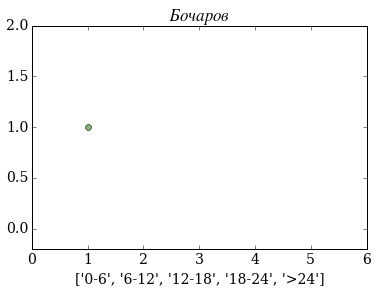

Казаков
{'ball_max': 1.08, 'diff': 0.16, 'fio': 'Казаков', 'sphere_max': 'хож;пон;сам;', 'sphere_min': 'соц;', 'ball_min': 0.92}


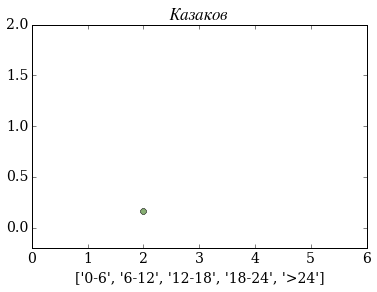

Медведев
{'ball_max': 1.05, 'diff': 0.48, 'fio': 'Медведев', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.57}


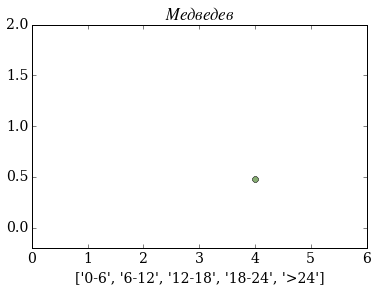

Курильников
{'ball_max': 1.15, 'diff': 0.2, 'fio': 'Курильников', 'sphere_max': 'хож;', 'sphere_min': 'хва;', 'ball_min': 0.95}
{'ball_max': 1.0, 'diff': 0.12, 'fio': 'Курильников', 'sphere_max': 'реч;', 'sphere_min': 'пер;соц;сам;', 'ball_min': 0.88}


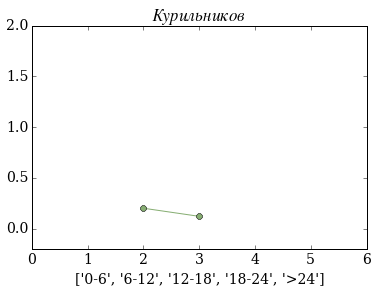

Атикова
{'ball_max': 0.88, 'diff': 0.23, 'fio': 'Атикова', 'sphere_max': 'пер;сам;', 'sphere_min': 'хож;', 'ball_min': 0.65}


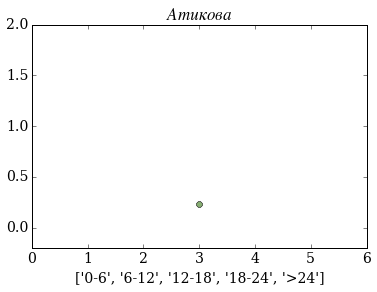

Худайберганова
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Худайберганова', 'sphere_max': 'сид;хва;соц;', 'sphere_min': 'пер;', 'ball_min': 0.0}


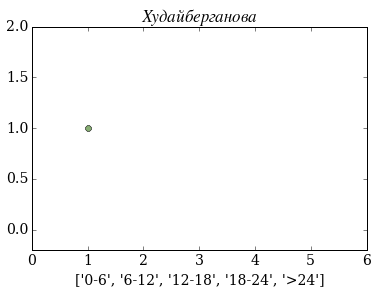

Алексеев
{'ball_max': 1.0, 'diff': 0.75, 'fio': 'Алексеев', 'sphere_max': 'пол;сид;хва;', 'sphere_min': 'пер;', 'ball_min': 0.25}


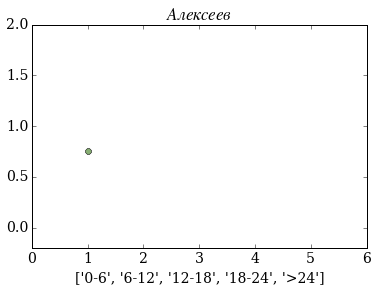

Бондарьков
{'ball_max': 1.02, 'diff': 0.42, 'fio': 'Бондарьков', 'sphere_max': 'хож;', 'sphere_min': 'пон;', 'ball_min': 0.6}


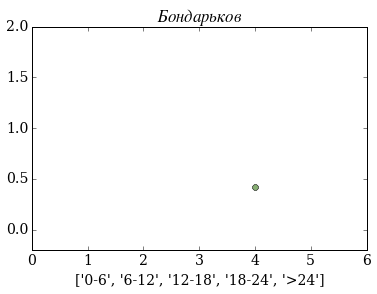

Зайцев
{'ball_max': 1.13, 'diff': 0.13, 'fio': 'Зайцев', 'sphere_max': 'пол;сид;хож;пер;', 'sphere_min': 'хва;реч;соц;', 'ball_min': 1.0}


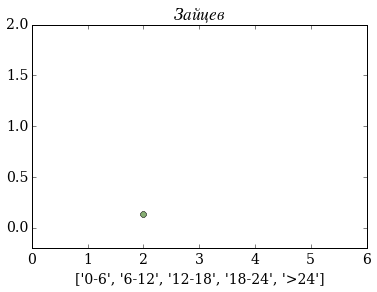

Макаров
{'ball_max': 1.33, 'diff': 0.55, 'fio': 'Макаров', 'sphere_max': 'сид;', 'sphere_min': 'реч;', 'ball_min': 0.78}


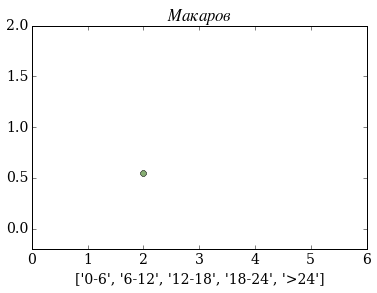

Востряков
{'ball_max': 1.0, 'diff': 0.33, 'fio': 'Востряков', 'sphere_max': 'пол;сид;хож;хва;пер;', 'sphere_min': 'реч;соц;', 'ball_min': 0.67}


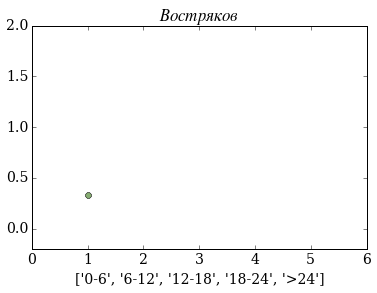

Сажко
{'ball_max': 1.08, 'diff': 0.36, 'fio': 'Сажко', 'sphere_max': 'хож;', 'sphere_min': 'реч;соц;', 'ball_min': 0.72}


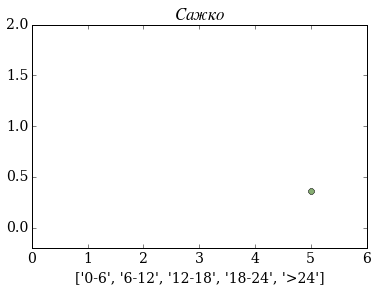

Орлов
{'ball_max': 0.96, 'diff': 0.39, 'fio': 'Орлов', 'sphere_max': 'хож;пер;', 'sphere_min': 'реч;пон;', 'ball_min': 0.57}


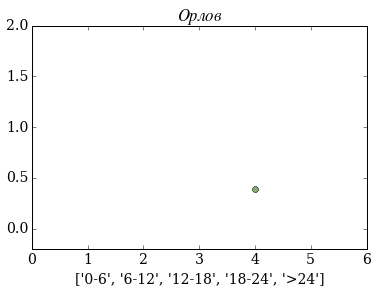

Савельева
{'ball_max': 1.5, 'diff': 1.5, 'fio': 'Савельева', 'sphere_max': 'пер;', 'sphere_min': 'сид;', 'ball_min': 0.0}
{'ball_max': 1.25, 'diff': 0.37, 'fio': 'Савельева', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.88}


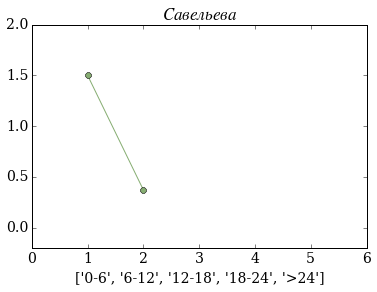

Козлов
{'ball_max': 1.23, 'diff': 0.35, 'fio': 'Козлов', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.88}
{'ball_max': 1.0, 'diff': 0.29, 'fio': 'Козлов', 'sphere_max': 'хож;лов;пер;соц;', 'sphere_min': 'реч;', 'ball_min': 0.71}
{'ball_max': 1.0, 'diff': 0.14, 'fio': 'Козлов', 'sphere_max': 'лов;пер;', 'sphere_min': 'реч;пон;соц;', 'ball_min': 0.86}


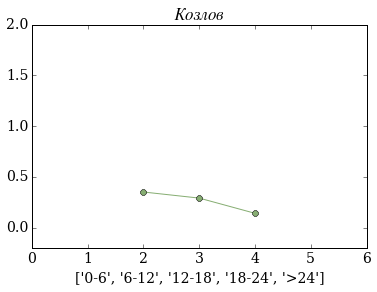

Коровин
{'ball_max': 1.1, 'diff': 0.32, 'fio': 'Коровин', 'sphere_max': 'пол;хож;соц;', 'sphere_min': 'реч;', 'ball_min': 0.78}


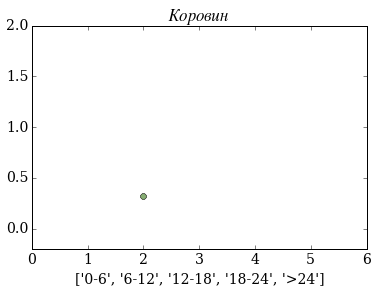

Казакова Д
{'ball_max': 1.08, 'diff': 0.33, 'fio': 'Казакова Д', 'sphere_max': 'сам;', 'sphere_min': 'лов;', 'ball_min': 0.75}


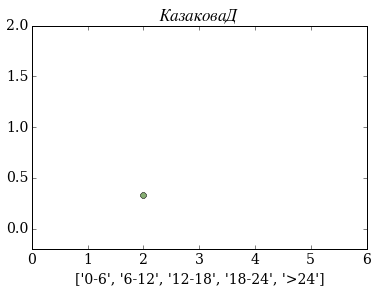

Крыков
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Крыков', 'sphere_max': 'пол;сид;хва;', 'sphere_min': 'сид;реч;', 'ball_min': 0.0}
{'ball_max': 1.05, 'diff': 0.63, 'fio': 'Крыков', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.42}


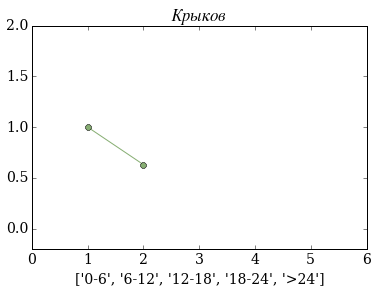

Чапарина 
{'ball_max': 1.07, 'diff': 0.14, 'fio': 'Чапарина ', 'sphere_max': 'хож;пер;сам;', 'sphere_min': 'лов;реч;пон;соц;', 'ball_min': 0.93}


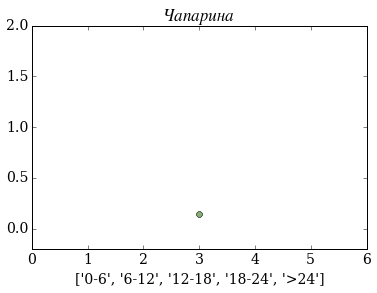

Давыдов С
{'ball_max': 1.07, 'diff': 0.34, 'fio': 'Давыдов С', 'sphere_max': 'хож;', 'sphere_min': 'сам;', 'ball_min': 0.73}
{'ball_max': 1.0, 'diff': 0.21, 'fio': 'Давыдов С', 'sphere_max': 'пер;сам;', 'sphere_min': 'реч;соц;', 'ball_min': 0.79}


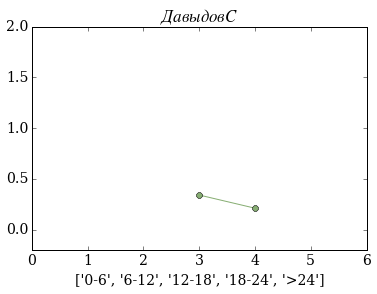

Лихачёв
{'ball_max': 1.0, 'diff': 0.33, 'fio': 'Лихачёв', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.67}
{'ball_max': 1.18, 'diff': 0.47, 'fio': 'Лихачёв', 'sphere_max': 'сид;хож;', 'sphere_min': 'реч;', 'ball_min': 0.71}
{'ball_max': 1.22, 'diff': 0.61, 'fio': 'Лихачёв', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.61}
{'ball_max': 1.14, 'diff': 0.52, 'fio': 'Лихачёв', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.62}
{'ball_max': 1.06, 'diff': 0.41, 'fio': 'Лихачёв', 'sphere_max': 'лов;', 'sphere_min': 'реч;', 'ball_min': 0.65}


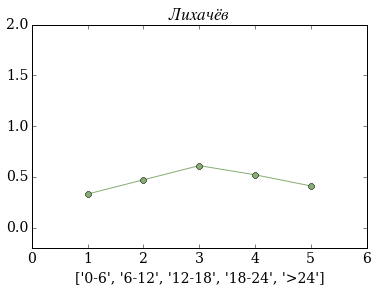

Афонина
{'ball_max': 1.25, 'diff': 0.75, 'fio': 'Афонина', 'sphere_max': 'сид;хож;', 'sphere_min': 'сид;реч;соц;соц;', 'ball_min': 0.5}
{'ball_max': 1.33, 'diff': 0.66, 'fio': 'Афонина', 'sphere_max': 'пол;', 'sphere_min': 'реч;соц;', 'ball_min': 0.67}
{'ball_max': 1.27, 'diff': 0.6, 'fio': 'Афонина', 'sphere_max': 'сам;', 'sphere_min': 'реч;', 'ball_min': 0.67}


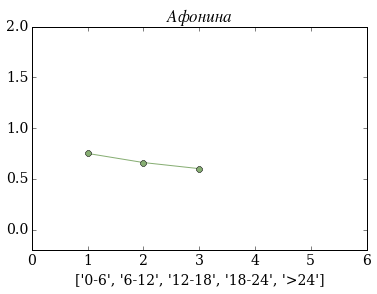

Колесова 
{'ball_max': 1.0, 'diff': 1.0, 'fio': 'Колесова ', 'sphere_max': 'пол;', 'sphere_min': 'сид;хож;хва;пер;реч;соц;', 'ball_min': 0.0}


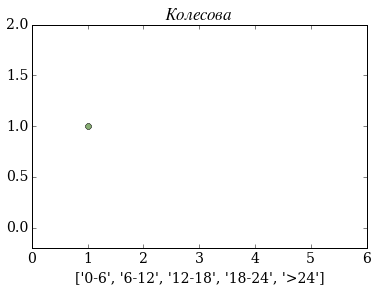

Сенцов
{'ball_max': 1.06, 'diff': 0.28, 'fio': 'Сенцов', 'sphere_max': 'пер;', 'sphere_min': 'пол;реч;', 'ball_min': 0.78}
{'ball_max': 1.06, 'diff': 0.32, 'fio': 'Сенцов', 'sphere_max': 'хож;', 'sphere_min': 'реч;сам;', 'ball_min': 0.74}


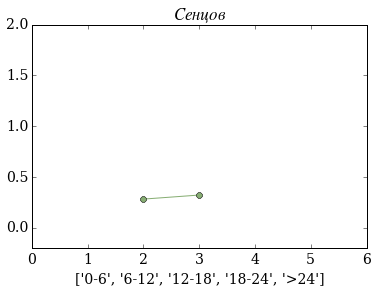

Лебеденко
{'ball_max': 1.1, 'diff': 0.2, 'fio': 'Лебеденко', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;', 'ball_min': 0.9}


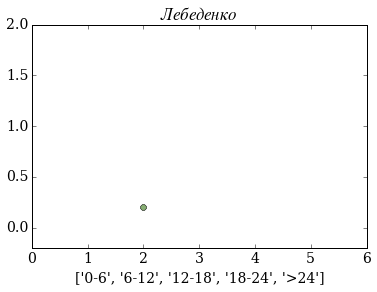

Артёмова
{'ball_max': 1.33, 'diff': 0.44, 'fio': 'Артёмова', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.89}
{'ball_max': 1.29, 'diff': 0.47, 'fio': 'Артёмова', 'sphere_max': 'сид;пер;', 'sphere_min': 'реч;', 'ball_min': 0.82}


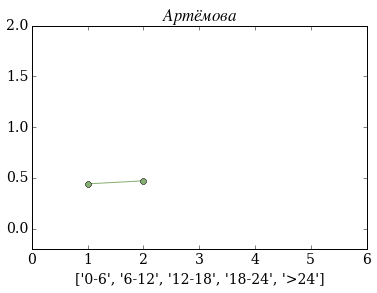

Сухотерина
{'ball_max': 1.04, 'diff': 0.29, 'fio': 'Сухотерина', 'sphere_max': 'хож;сам;', 'sphere_min': 'реч;', 'ball_min': 0.75}


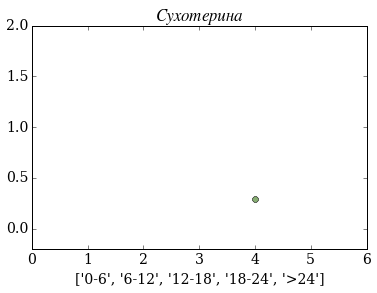

Кобелев
{'ball_max': 1.09, 'diff': 0.22, 'fio': 'Кобелев', 'sphere_max': 'лов;', 'sphere_min': 'соц;', 'ball_min': 0.87}


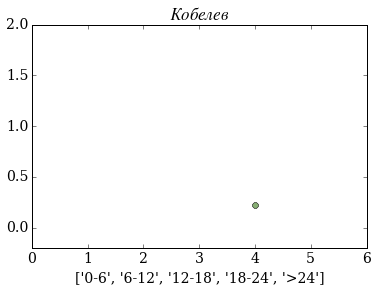

Иванова
{'ball_max': 1.0, 'diff': 0.15, 'fio': 'Иванова', 'sphere_max': 'пер;пон;', 'sphere_min': 'хож;лов;', 'ball_min': 0.85}


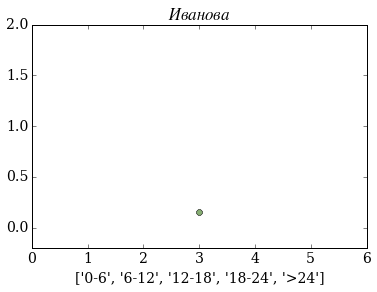

Степанов
{'ball_max': 1.73, 'diff': 0.91, 'fio': 'Степанов', 'sphere_max': 'соц;', 'sphere_min': 'реч;', 'ball_min': 0.82}


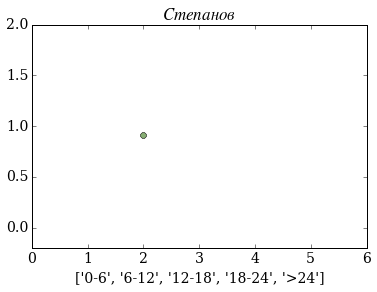

Горват
{'ball_max': 1.5, 'diff': 1.0, 'fio': 'Горват', 'sphere_max': 'пер;соц;', 'sphere_min': 'сид;хож;реч;', 'ball_min': 0.5}


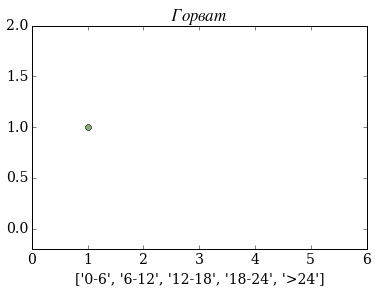

Давыдов Д
{'ball_max': 1.29, 'diff': 0.82, 'fio': 'Давыдов Д', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.47}


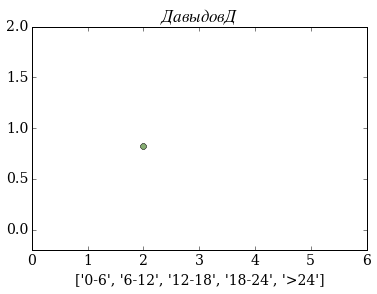

Козлова
{'ball_max': 1.12, 'diff': 0.41, 'fio': 'Козлова', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.71}


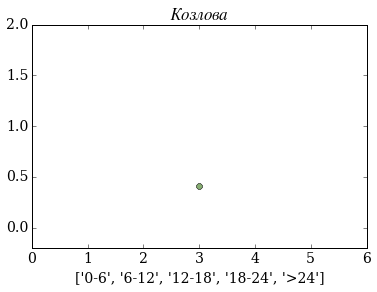

Смольянинов
{'ball_max': 1.14, 'diff': 0.71, 'fio': 'Смольянинов', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.43}


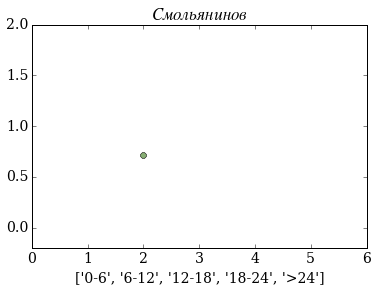

Брусников
{'ball_max': 1.08, 'diff': 0.62, 'fio': 'Брусников', 'sphere_max': 'сид;', 'sphere_min': 'соц;', 'ball_min': 0.46}
{'ball_max': 1.0, 'diff': 0.42, 'fio': 'Брусников', 'sphere_max': 'хож;', 'sphere_min': 'реч;пон;', 'ball_min': 0.58}


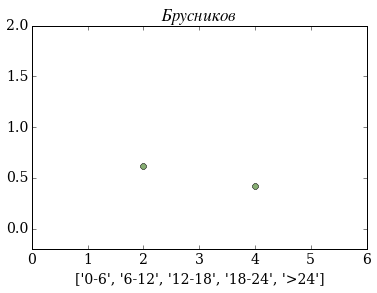

Кафитулина
{'ball_max': 1.5, 'diff': 1.5, 'fio': 'Кафитулина', 'sphere_max': 'пер;', 'sphere_min': 'хва;', 'ball_min': 0.0}


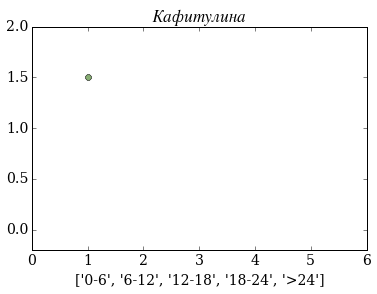

Березнев
{'ball_max': 1.17, 'diff': 0.28, 'fio': 'Березнев', 'sphere_max': 'лов;пер;', 'sphere_min': 'реч;', 'ball_min': 0.89}


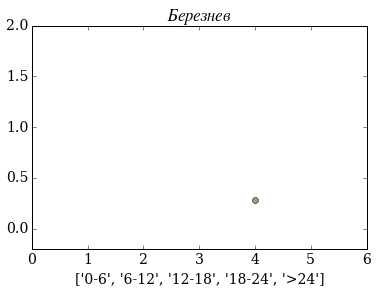

Дорофеева
{'ball_max': 1.12, 'diff': 0.29, 'fio': 'Дорофеева', 'sphere_max': 'сам;', 'sphere_min': 'реч;', 'ball_min': 0.83}
{'ball_max': 1.0, 'diff': 0.08, 'fio': 'Дорофеева', 'sphere_max': 'сам;', 'sphere_min': 'хож;лов;пер;реч;соц;', 'ball_min': 0.92}


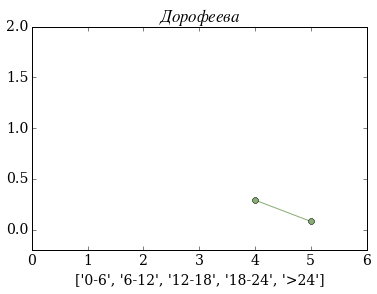

Торжков
{'ball_max': 1.33, 'diff': 0.77, 'fio': 'Торжков', 'sphere_max': 'пол;хож;', 'sphere_min': 'реч;', 'ball_min': 0.56}


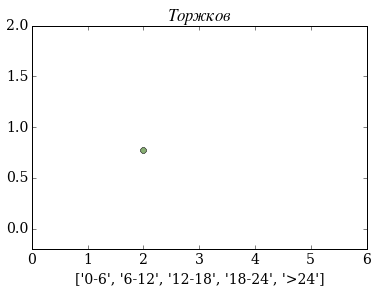

Иванов
{'ball_max': 1.17, 'diff': 0.64, 'fio': 'Иванов', 'sphere_max': 'пер;', 'sphere_min': 'реч;', 'ball_min': 0.53}


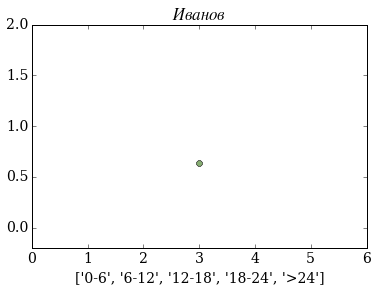

Аляев
{'ball_max': 1.33, 'diff': 0.44, 'fio': 'Аляев', 'sphere_max': 'пол;', 'sphere_min': 'реч;соц;', 'ball_min': 0.89}
{'ball_max': 1.11, 'diff': 0.18, 'fio': 'Аляев', 'sphere_max': 'хож;', 'sphere_min': 'пер;реч;соц;сам;', 'ball_min': 0.93}
{'ball_max': 1.09, 'diff': 0.23, 'fio': 'Аляев', 'sphere_max': 'хож;', 'sphere_min': 'реч;', 'ball_min': 0.86}


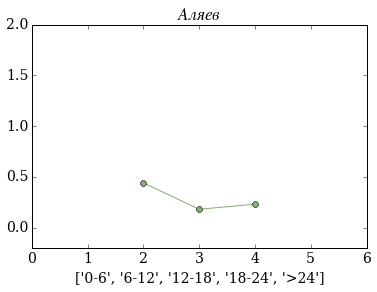

Соловьёва
{'ball_max': 1.5, 'diff': 0.5, 'fio': 'Соловьёва', 'sphere_max': 'хож;', 'sphere_min': 'пол;реч;соц;', 'ball_min': 1.0}


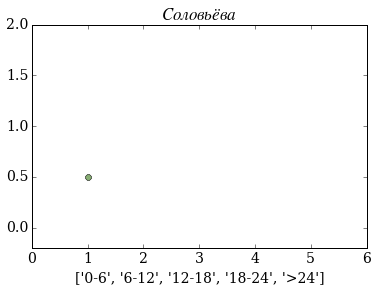

Усенко
{'ball_max': 1.02, 'diff': 0.26, 'fio': 'Усенко', 'sphere_max': 'лов;', 'sphere_min': 'реч;', 'ball_min': 0.76}


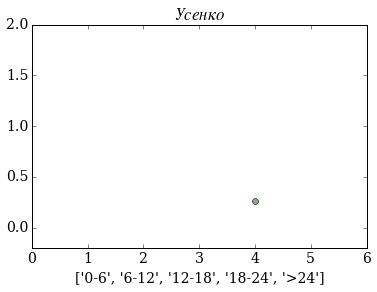

In [254]:
for item in fam:
    print(item)
    diff = list()
    diff.append(None)
    for k in range(5):
        i = 0;
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                i = i + 1;
                diff.append(t['diff'])
        if i == 0:
            diff.append(None)
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(diff)), diff, color='sage', marker="8")
    ax.set_ylim((-0.2, 2))
    ax.set_xlim((0, 6))
    ax.set_xlabel(['0-6', '6-12','12-18', '18-24', '>24'])
    plt.savefig('pat_%s_diff.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()

In [255]:
d1 = pandas.DataFrame(s[0])
d2 = pandas.DataFrame(s[1])
d3 = pandas.DataFrame(s[2])
d4 = pandas.DataFrame(s[3])
d5 = pandas.DataFrame(s[4])

d = pandas.concat([d1,d2,d3,d4])
d.describe()
writer = pandas.ExcelWriter('pat.xlsx')
d.to_excel(writer,'Sheet1')
writer.save()

In [256]:
def fil(data):
    up = [0,6,12,18,24]
    l_max = list()
    l_min = list()
    l = {}
    for i in range(1,6):
        k = list()
        if i ==5:
            #kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] > up[i-1])])
            kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1])])
        else:
            #kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
        kc1 = kc[['fio','sphere','ball']].groupby(['fio']).max()
        i = 0;
        for item in kc1.iterrows():
            #print(item[0], item[1]['sphere'])
            sphere = kc[(kc['ball'] == item[1]['ball']) & (kc['fio'] == item[0])]
            #print(sphere)
            sf = ''
            for q in sphere.iterrows():
                #print(q[1]['sphere'])
                sf = sf + q[1]['sphere'][:3] + ';'
            kc1.set_value(item[0], 'sphere', sf)
            #kc.loc[(kc['ball'] == item['ball']) & (kc['fio'] == item['fio'])]['sphere']
            i = i + 1
        l_max.append(kc1)
        kc2 = kc[['fio','sphere','ball']].groupby(['fio']).min()
        i = 0;
        for item in kc2.iterrows():
            #print(item[0], item[1]['sphere'])
            sphere = kc[(kc['ball'] == item[1]['ball']) & (kc['fio'] == item[0])]
            #print(sphere)
            sf = ''
            for q in sphere.iterrows():
                #print(q[1]['sphere'])
                sf = sf + q[1]['sphere'][:3] + ';'
            kc2.set_value(item[0], 'sphere', sf)
            #kc.loc[(kc['ball'] == item['ball']) & (kc['fio'] == item['fio'])]['sphere']
            i = i + 1
        l_min.append(kc2)
    l['max'] = l_max
    l['min'] = l_min
    return l

In [257]:
d = fil(data)
print(d)

{'max': [                          sphere  ball
fio                                   
Грузнова            пол;сид;пер;  1.20
Зевакин                     сид;  1.18
Котов                   хож;хва;  1.25
Селезенева                  хва;  1.25
Трошин                      пер;  1.50
Трусов      пол;хож;пер;реч;соц;  1.00,                               sphere  ball
fio                                       
Зевакин     пол;сид;хож;хва;пер;соц;  1.14
Кабирова                        пол;  1.33
Котов                       пол;сид;  1.29
Селезенева                  пол;сид;  1.29,         sphere  ball
fio                 
Суховей   пер;   1.1
Трусов    пон;   1.0,         sphere  ball
fio                 
Рябкова   реч;  1.42,                 sphere  ball
fio                         
Зеникова  лов;пер;сам;  0.96], 'min': [                              sphere  ball
fio                                       
Грузнова            хож;хва;реч;соц;  0.80
Зевакин                         реч;  0.73
К

In [258]:
s = list()
fam = {}
for i in range(5):
    fio = list()
    for item in d['min'][i].iterrows():
        res = {}
        fam[item[0]] = 1
        #print(item[0],item[1]['sphere'],item[1]['ball'])
        res['fio'],res['sphere_min'],res['ball_min'] = item[0],item[1]['sphere'],item[1]['ball']
        l = d['max'][i].index == item[0]
        #print(l)
        k = numpy.where(l == True)
        #print(k[0])
        m = d['max'][i].ix[k[0]]
        #print(m.index, m['sphere'], m['ball'])
        res['sphere_max'],res['ball_max'] = m['sphere'][0], float("{0:.2f}".format(m['ball'][0]))
        #print('РАЗНОСТЬ', m['ball'] - item[1]['ball'])
        t = m['ball'] - item[1]['ball']
        res['diff'] = float("{0:.2f}".format(t[0]))
        fio.append(res)
    s.append(fio)
print(s)

[[{'ball_max': 1.2, 'diff': 0.4, 'fio': 'Грузнова', 'sphere_max': 'пол;сид;пер;', 'sphere_min': 'хож;хва;реч;соц;', 'ball_min': 0.8}, {'ball_max': 1.18, 'diff': 0.45, 'fio': 'Зевакин', 'sphere_max': 'сид;', 'sphere_min': 'реч;', 'ball_min': 0.73}, {'ball_max': 1.25, 'diff': 0.37, 'fio': 'Котов', 'sphere_max': 'хож;хва;', 'sphere_min': 'реч;соц;', 'ball_min': 0.88}, {'ball_max': 1.25, 'diff': 0.75, 'fio': 'Селезенева', 'sphere_max': 'хва;', 'sphere_min': 'сид;', 'ball_min': 0.5}, {'ball_max': 1.5, 'diff': 0.5, 'fio': 'Трошин', 'sphere_max': 'пер;', 'sphere_min': 'пол;сид;хож;хва;реч;соц;', 'ball_min': 1.0}, {'ball_max': 1.0, 'diff': 0.67, 'fio': 'Трусов', 'sphere_max': 'пол;хож;пер;реч;соц;', 'sphere_min': 'сид;', 'ball_min': 0.33}], [{'ball_max': 1.14, 'diff': 0.28, 'fio': 'Зевакин', 'sphere_max': 'пол;сид;хож;хва;пер;соц;', 'sphere_min': 'реч;', 'ball_min': 0.86}, {'ball_max': 1.33, 'diff': 0.66, 'fio': 'Кабирова', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.67}, {'ball_

Трошин
{'ball_max': 1.5, 'diff': 0.5, 'fio': 'Трошин', 'sphere_max': 'пер;', 'sphere_min': 'пол;сид;хож;хва;реч;соц;', 'ball_min': 1.0}


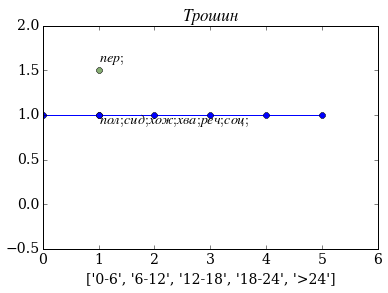

Кабирова
{'ball_max': 1.33, 'diff': 0.66, 'fio': 'Кабирова', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.67}


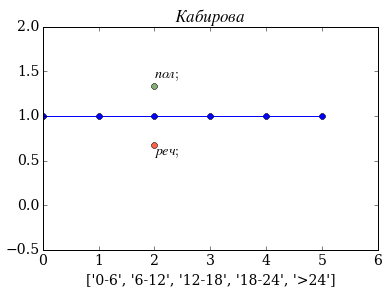

Селезенева
{'ball_max': 1.25, 'diff': 0.75, 'fio': 'Селезенева', 'sphere_max': 'хва;', 'sphere_min': 'сид;', 'ball_min': 0.5}
{'ball_max': 1.29, 'diff': 0.29, 'fio': 'Селезенева', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;соц;', 'ball_min': 1.0}


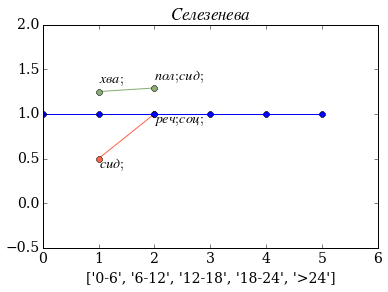

Зеникова
{'ball_max': 0.96, 'diff': 0.26, 'fio': 'Зеникова', 'sphere_max': 'лов;пер;сам;', 'sphere_min': 'реч;', 'ball_min': 0.7}


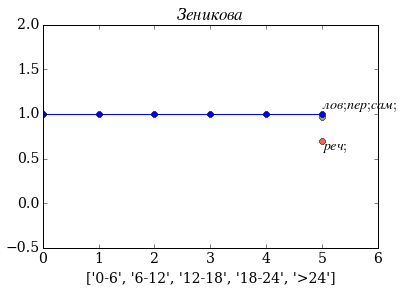

Котов
{'ball_max': 1.25, 'diff': 0.37, 'fio': 'Котов', 'sphere_max': 'хож;хва;', 'sphere_min': 'реч;соц;', 'ball_min': 0.88}
{'ball_max': 1.29, 'diff': 0.58, 'fio': 'Котов', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;', 'ball_min': 0.71}


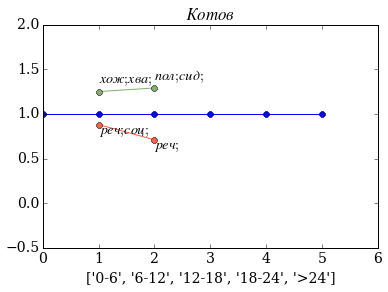

Грузнова
{'ball_max': 1.2, 'diff': 0.4, 'fio': 'Грузнова', 'sphere_max': 'пол;сид;пер;', 'sphere_min': 'хож;хва;реч;соц;', 'ball_min': 0.8}


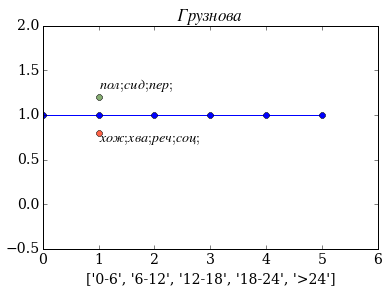

Зевакин
{'ball_max': 1.18, 'diff': 0.45, 'fio': 'Зевакин', 'sphere_max': 'сид;', 'sphere_min': 'реч;', 'ball_min': 0.73}
{'ball_max': 1.14, 'diff': 0.28, 'fio': 'Зевакин', 'sphere_max': 'пол;сид;хож;хва;пер;соц;', 'sphere_min': 'реч;', 'ball_min': 0.86}


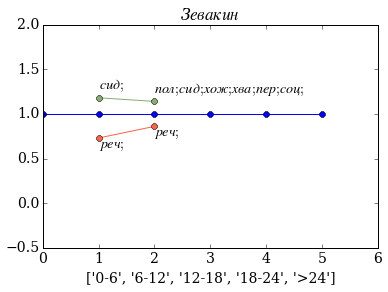

Трусов
{'ball_max': 1.0, 'diff': 0.67, 'fio': 'Трусов', 'sphere_max': 'пол;хож;пер;реч;соц;', 'sphere_min': 'сид;', 'ball_min': 0.33}
{'ball_max': 1.0, 'diff': 0.15, 'fio': 'Трусов', 'sphere_max': 'пон;', 'sphere_min': 'соц;', 'ball_min': 0.85}


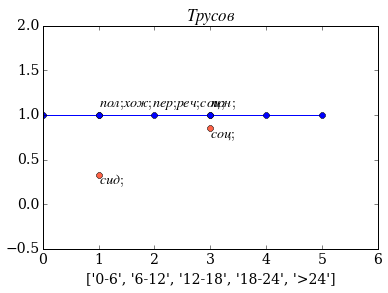

Суховей
{'ball_max': 1.1, 'diff': 0.2, 'fio': 'Суховей', 'sphere_max': 'пер;', 'sphere_min': 'реч;пон;', 'ball_min': 0.9}


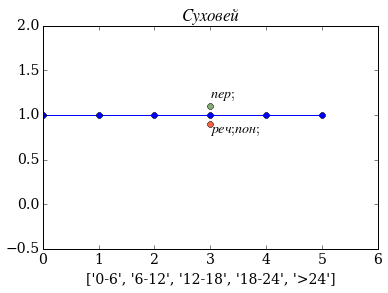

Рябкова
{'ball_max': 1.42, 'diff': 0.46, 'fio': 'Рябкова', 'sphere_max': 'реч;', 'sphere_min': 'сам;', 'ball_min': 0.96}


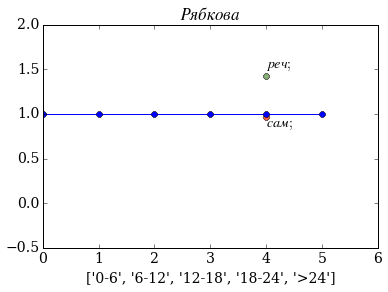

In [260]:
for item in fam:
    print(item)
    list_max = list()
    list_min = list()
    sphere_max = list()
    sphere_min = list()
    list_max.append(None)
    list_min.append(None)
    sphere_max.append(None)
    sphere_min.append(None)
    for k in range(5):
        i = 0;
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                i = i + 1;
                list_max.append(t['ball_max'])
                list_min.append(t['ball_min'])
                sphere_max.append(t['sphere_max'])
                sphere_min.append(t['sphere_min'])
        if i == 0:
            list_max.append(None)
            list_min.append(None)
            sphere_max.append(None)
            sphere_min.append(None)
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(list_max)), list_max, color='sage', marker="8")
    ax.plot(range(len(list_max)), list_min, color = 'tomato', marker="8")
    ax.plot(range(len(list_max)), [1 for i in range(len(list_max))], marker="8")
    ax.set_ylim((-0.5, 2))
    ax.set_xlim((0, 6))
    ax.set_xlabel(['0-6', '6-12','12-18', '18-24', '>24'])
    for sp in range(len(list_max)):
        if sphere_max[sp] != None:
            ax.annotate('$%s$'%sphere_max[sp], xy=(sp, list_max[sp]+0.1), xytext=(sp, list_max[sp]+0.1))
        if sphere_min[sp] != None:
            ax.annotate('$%s$'%sphere_min[sp], xy=(sp, list_min[sp]-0.1), xytext=(sp, list_min[sp]-0.1))
    plt.savefig('norma_%s.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()

Трошин
{'ball_max': 1.5, 'diff': 0.5, 'fio': 'Трошин', 'sphere_max': 'пер;', 'sphere_min': 'пол;сид;хож;хва;реч;соц;', 'ball_min': 1.0}


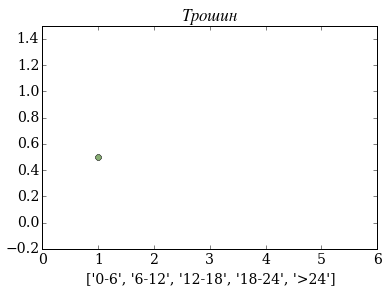

Кабирова
{'ball_max': 1.33, 'diff': 0.66, 'fio': 'Кабирова', 'sphere_max': 'пол;', 'sphere_min': 'реч;', 'ball_min': 0.67}


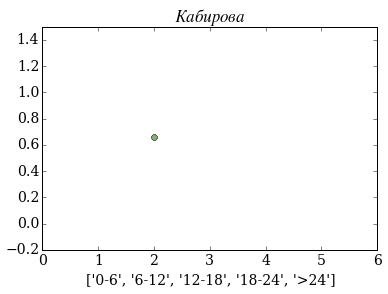

Селезенева
{'ball_max': 1.25, 'diff': 0.75, 'fio': 'Селезенева', 'sphere_max': 'хва;', 'sphere_min': 'сид;', 'ball_min': 0.5}
{'ball_max': 1.29, 'diff': 0.29, 'fio': 'Селезенева', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;соц;', 'ball_min': 1.0}


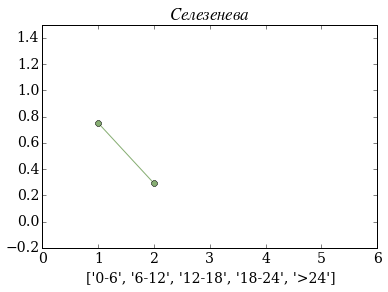

Зеникова
{'ball_max': 0.96, 'diff': 0.26, 'fio': 'Зеникова', 'sphere_max': 'лов;пер;сам;', 'sphere_min': 'реч;', 'ball_min': 0.7}


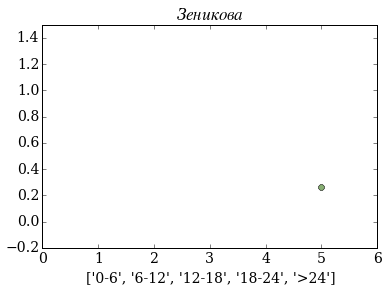

Котов
{'ball_max': 1.25, 'diff': 0.37, 'fio': 'Котов', 'sphere_max': 'хож;хва;', 'sphere_min': 'реч;соц;', 'ball_min': 0.88}
{'ball_max': 1.29, 'diff': 0.58, 'fio': 'Котов', 'sphere_max': 'пол;сид;', 'sphere_min': 'реч;', 'ball_min': 0.71}


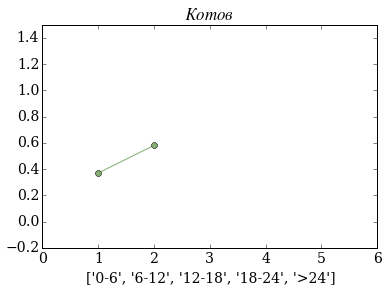

Грузнова
{'ball_max': 1.2, 'diff': 0.4, 'fio': 'Грузнова', 'sphere_max': 'пол;сид;пер;', 'sphere_min': 'хож;хва;реч;соц;', 'ball_min': 0.8}


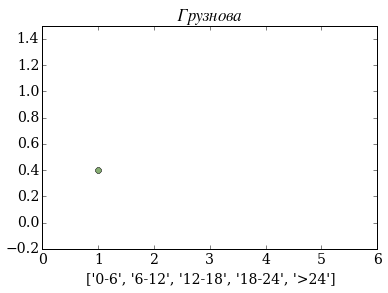

Зевакин
{'ball_max': 1.18, 'diff': 0.45, 'fio': 'Зевакин', 'sphere_max': 'сид;', 'sphere_min': 'реч;', 'ball_min': 0.73}
{'ball_max': 1.14, 'diff': 0.28, 'fio': 'Зевакин', 'sphere_max': 'пол;сид;хож;хва;пер;соц;', 'sphere_min': 'реч;', 'ball_min': 0.86}


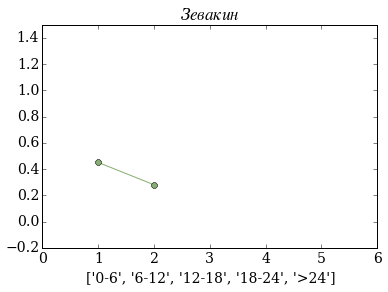

Трусов
{'ball_max': 1.0, 'diff': 0.67, 'fio': 'Трусов', 'sphere_max': 'пол;хож;пер;реч;соц;', 'sphere_min': 'сид;', 'ball_min': 0.33}
{'ball_max': 1.0, 'diff': 0.15, 'fio': 'Трусов', 'sphere_max': 'пон;', 'sphere_min': 'соц;', 'ball_min': 0.85}


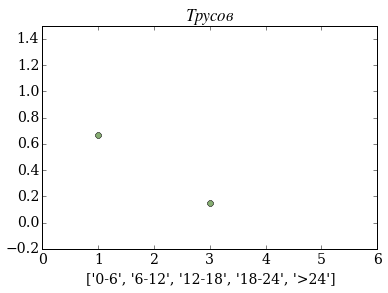

Суховей
{'ball_max': 1.1, 'diff': 0.2, 'fio': 'Суховей', 'sphere_max': 'пер;', 'sphere_min': 'реч;пон;', 'ball_min': 0.9}


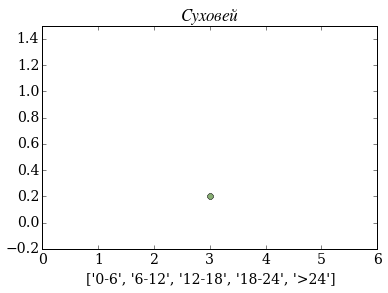

Рябкова
{'ball_max': 1.42, 'diff': 0.46, 'fio': 'Рябкова', 'sphere_max': 'реч;', 'sphere_min': 'сам;', 'ball_min': 0.96}


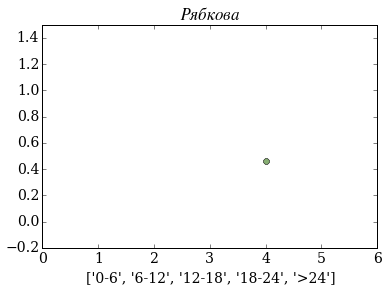

In [261]:
for item in fam:
    print(item)
    diff = list()
    diff.append(None)
    for k in range(5):
        i = 0;
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                i = i + 1;
                diff.append(t['diff'])
        if i == 0:
            diff.append(None)
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(diff)), diff, color='sage', marker="8")
    ax.set_ylim((-0.2, 1.5))
    ax.set_xlim((0, 6))
    ax.set_xlabel(['0-6', '6-12','12-18', '18-24', '>24'])
    plt.savefig('norma_%s_diff.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()

In [262]:
d1 = pandas.DataFrame(s[0])
d2 = pandas.DataFrame(s[1])
d3 = pandas.DataFrame(s[2])
d4 = pandas.DataFrame(s[3])
d5 = pandas.DataFrame(s[4])

d = pandas.concat([d1,d2,d3,d4])
d.describe()
writer = pandas.ExcelWriter('norma.xlsx')
d.to_excel(writer,'Sheet1')
writer.save()

In [263]:
def fil(data):
    up = [0,6,12,18,24]
    spe = list()
    soc = list()
    sam = list()
    l = {}
    for i in range(1,6):
        k = list()
        if i ==5:
            kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'речь') & (data['category'] > up[i-1])])
            kc1 = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'социальное ') & (data['category'] > up[i-1])])
            kc2 = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'самостоятельность') & (data['category'] > up[i-1])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1])])
        else:
            kc = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'речь')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            kc1 = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'социальное ')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            kc2 = pandas.DataFrame(data[((data['group']  == 'кц') | (data['group'] == 'дом')) & (data['sphere'] == 'самостоятельность')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
        kc = kc[['fio','sphere','ball']].groupby(['fio']).mean()
        kc1 = kc1[['fio','sphere','ball']].groupby(['fio']).mean()
        kc2 = kc2[['fio','sphere','ball']].groupby(['fio']).mean()
        spe.append(kc)
        soc.append(kc1)
        sam.append(kc2)
        #kc2 = kc[['fio','sphere','ball']].groupby(['fio']).min()
        #l_min.append(kc2)
    l['spe'] = spe
    l['soc'] = soc
    l['sam'] = sam
    return l

In [264]:
d = fil(data)
print(d)

{'soc': [                    ball
fio                     
Алексеев        0.500000
Артёмова        1.110000
Афонина         0.666667
Бочаров         1.000000
Венецкий        0.600000
Востряков       0.670000
Горват          1.500000
Кафитулина      1.000000
Колесова        0.000000
Крыков          0.750000
Лихачёв         0.830000
Матушкин        0.750000
Ростенко        1.125000
Савельева       0.500000
Соловьёва       1.000000
Худайберганова  1.000000,               ball
fio               
Аляев        0.890
Артёмова     0.955
Афонина      0.795
Брусников    0.605
Венецкий     0.930
Воробьёва    0.925
Давыдов Д    0.820
Зайцев       1.000
Ивлиев       0.940
Казаков      0.920
Казакова Д   0.920
Козлов       0.955
Коровин      1.100
Крыков       0.880
Курильников  1.000
Лебеденко    1.000
Лихачёв      0.865
Макаров      0.890
Ростенко     0.890
Савельева    1.000
Сенцов       0.890
Смольянинов  0.955
Степанов     1.730
Торжков      0.890,               ball
fio               
Аляев  

In [265]:
s = list()
fam = {}
for i in range(0,5):
    fio = list()
    for item in d['soc'][i].iterrows():
        res = {}
        fam[item[0]] = 1
        #print(item[0],item[1]['sphere'],item[1]['ball'])
        res['fio'],res['ball_soc'] = item[0], float("{0:.2f}".format(item[1]['ball']))
        l = d['soc'][i].index == item[0]
        #print(l)
        k = numpy.where(l == True)
        #print(k[0])
        m = d['spe'][i].ix[k[0]]
        #1
        res['ball_spe'] = float("{0:.2f}".format(m['ball'][0]))
        try:
            #print(d['sam'][i].ix[k[0]])
            m = d['sam'][i].ix[k[0]]
            res['ball_sam'] = float("{0:.2f}".format(m['ball'][0]))
        except:
            rt = 0
            #res['ball_sam'] = -1
        #print('РАЗНОСТЬ', m['ball'] - item[1]['ball'])
        #t = m['ball'] - item[1]['ball']
        #res['diff'] = float("{0:.2f}".format(t[0]))
        fio.append(res)
    s.append(fio)
print(s)

[[{'ball_soc': 0.5, 'ball_spe': 0.5, 'fio': 'Алексеев'}, {'ball_soc': 1.11, 'ball_spe': 0.89, 'fio': 'Артёмова'}, {'ball_soc': 0.67, 'ball_spe': 0.6, 'fio': 'Афонина'}, {'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Бочаров'}, {'ball_soc': 0.6, 'ball_spe': 0.7, 'fio': 'Венецкий '}, {'ball_soc': 0.67, 'ball_spe': 0.67, 'fio': 'Востряков'}, {'ball_soc': 1.5, 'ball_spe': 0.5, 'fio': 'Горват'}, {'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Кафитулина'}, {'ball_soc': 0.0, 'ball_spe': 0.0, 'fio': 'Колесова '}, {'ball_soc': 0.75, 'ball_spe': 0.34, 'fio': 'Крыков'}, {'ball_soc': 0.83, 'ball_spe': 0.67, 'fio': 'Лихачёв'}, {'ball_soc': 0.75, 'ball_spe': 0.88, 'fio': 'Матушкин'}, {'ball_soc': 1.12, 'ball_spe': 1.12, 'fio': 'Ростенко '}, {'ball_soc': 0.5, 'ball_spe': 1.0, 'fio': 'Савельева'}, {'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Соловьёва'}, {'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Худайберганова'}], [{'ball_soc': 0.89, 'ball_spe': 0.89, 'ball_sam': 1.17, 'fio': 'Аляев'}, {'ball_soc': 0.96, 'ball

Давыдов Д
{'ball_soc': 0.82, 'ball_spe': 0.47, 'fio': 'Давыдов Д'}


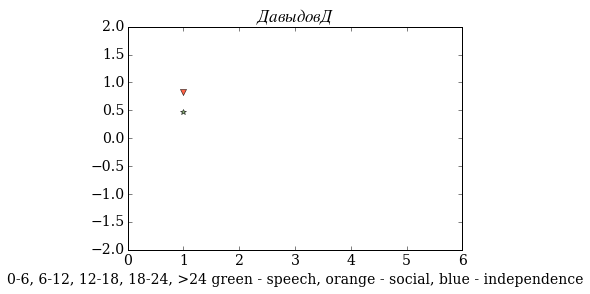

Венецкий 
{'ball_soc': 0.6, 'ball_spe': 0.7, 'fio': 'Венецкий '}
{'ball_soc': 0.93, 'ball_spe': 0.93, 'ball_sam': 1.0, 'fio': 'Венецкий '}


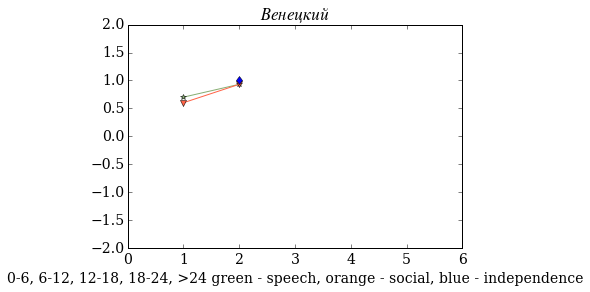

Матушкин
{'ball_soc': 0.75, 'ball_spe': 0.88, 'fio': 'Матушкин'}


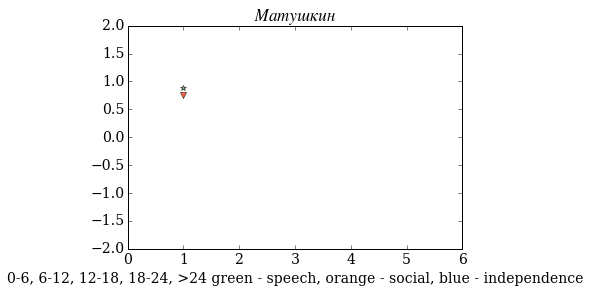

Ивлиев
{'ball_soc': 0.94, 'ball_spe': 0.59, 'fio': 'Ивлиев'}


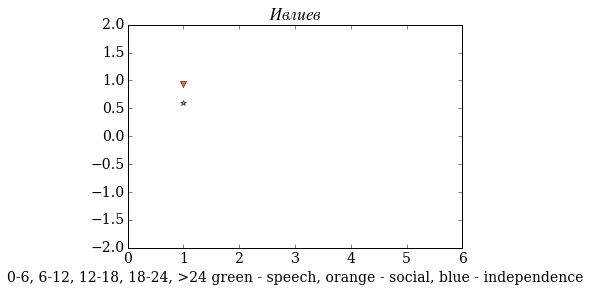

Лыгина
{'ball_soc': 0.95, 'ball_spe': 0.83, 'ball_sam': 1.56, 'fio': 'Лыгина'}


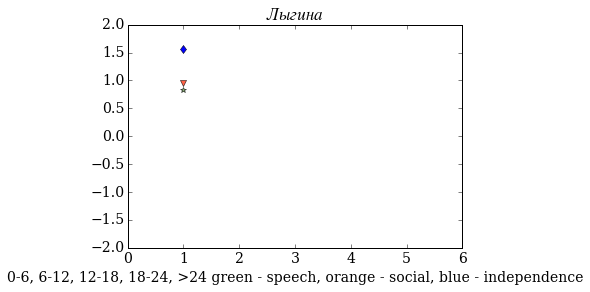

Ростенко 
{'ball_soc': 1.12, 'ball_spe': 1.12, 'fio': 'Ростенко '}
{'ball_soc': 0.89, 'ball_spe': 1.0, 'fio': 'Ростенко '}
{'ball_soc': 0.98, 'ball_spe': 0.86, 'ball_sam': 0.86, 'fio': 'Ростенко '}


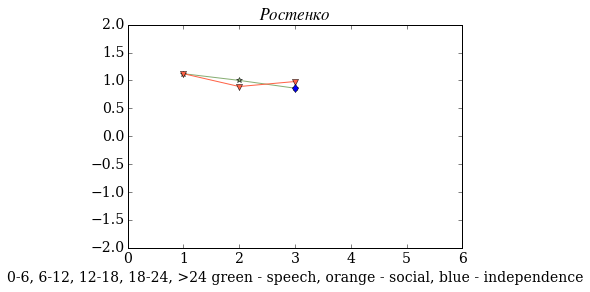

Воробьёва 
{'ball_soc': 0.93, 'ball_spe': 0.8, 'ball_sam': 0.92, 'fio': 'Воробьёва '}


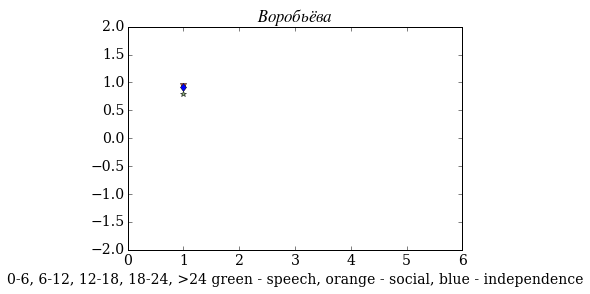

Бочаров
{'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Бочаров'}


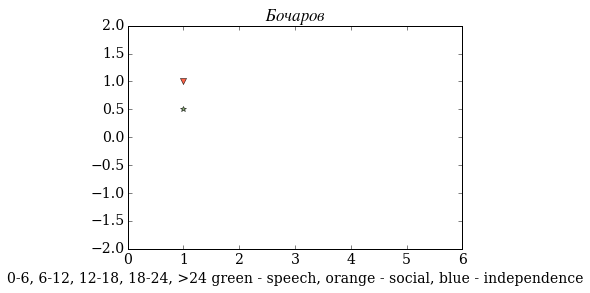

Казаков
{'ball_soc': 0.92, 'ball_spe': 1.0, 'fio': 'Казаков'}


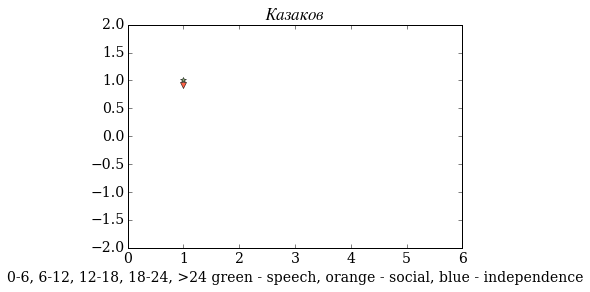

Медведев
{'ball_soc': 0.76, 'ball_spe': 0.57, 'ball_sam': 0.76, 'fio': 'Медведев'}


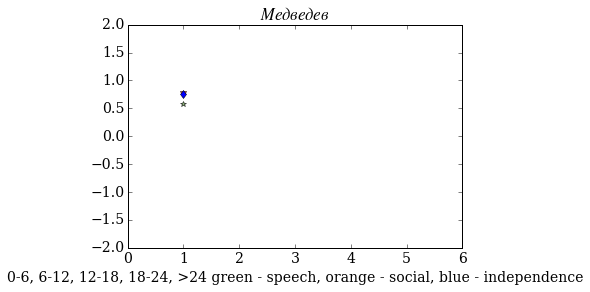

Курильников
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Курильников'}
{'ball_soc': 0.88, 'ball_spe': 1.0, 'ball_sam': 0.88, 'fio': 'Курильников'}


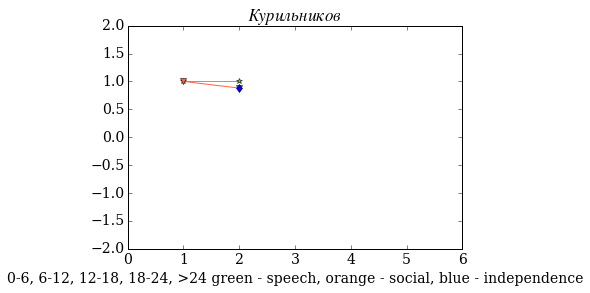

Атикова
{'ball_soc': 0.74, 'ball_spe': 0.76, 'ball_sam': 0.88, 'fio': 'Атикова'}


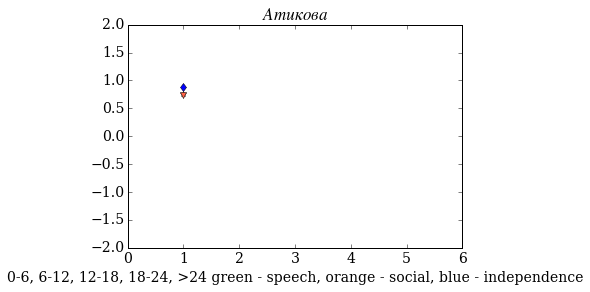

Худайберганова
{'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Худайберганова'}


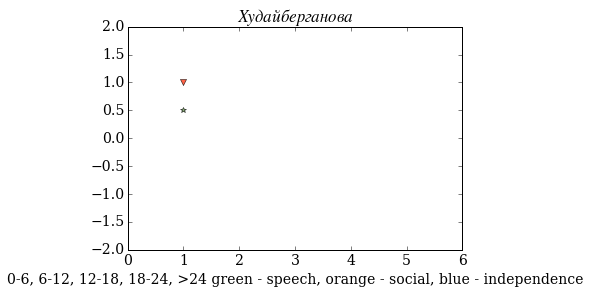

Алексеев
{'ball_soc': 0.5, 'ball_spe': 0.5, 'fio': 'Алексеев'}


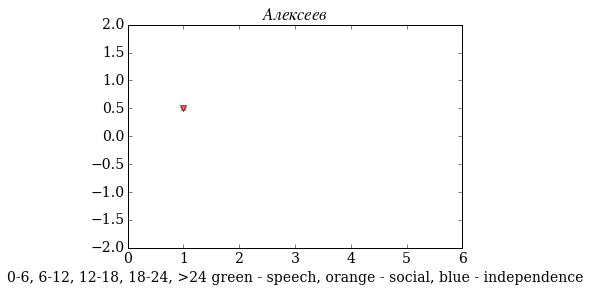

Бондарьков
{'ball_soc': 0.67, 'ball_spe': 0.62, 'ball_sam': 0.93, 'fio': 'Бондарьков'}


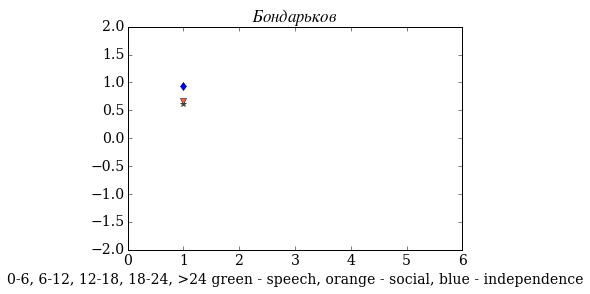

Зайцев
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Зайцев'}


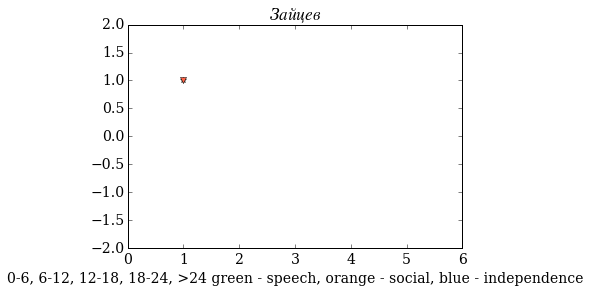

Макаров
{'ball_soc': 0.89, 'ball_spe': 0.78, 'fio': 'Макаров'}


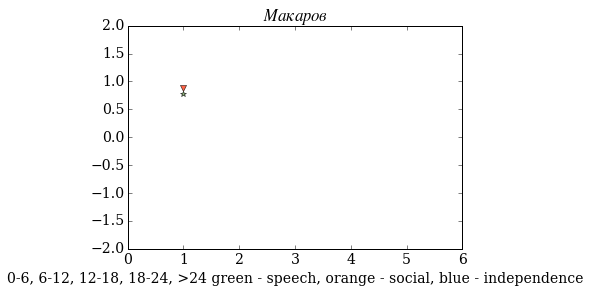

Востряков
{'ball_soc': 0.67, 'ball_spe': 0.67, 'fio': 'Востряков'}


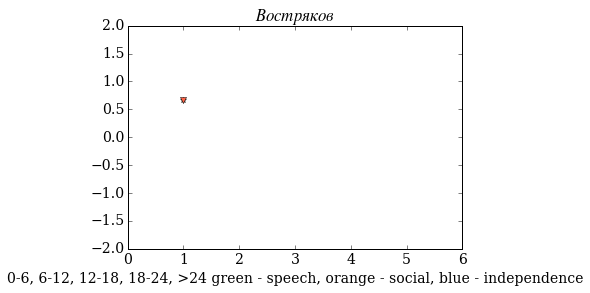

Сажко
{'ball_soc': 0.72, 'ball_spe': 0.72, 'ball_sam': 0.88, 'fio': 'Сажко'}


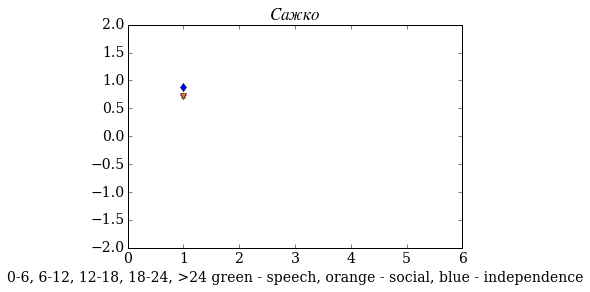

Орлов
{'ball_soc': 0.78, 'ball_spe': 0.57, 'ball_sam': 0.91, 'fio': 'Орлов'}


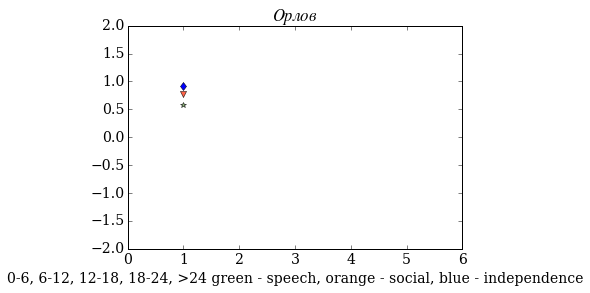

Савельева
{'ball_soc': 0.5, 'ball_spe': 1.0, 'fio': 'Савельева'}
{'ball_soc': 1.0, 'ball_spe': 0.9, 'fio': 'Савельева'}


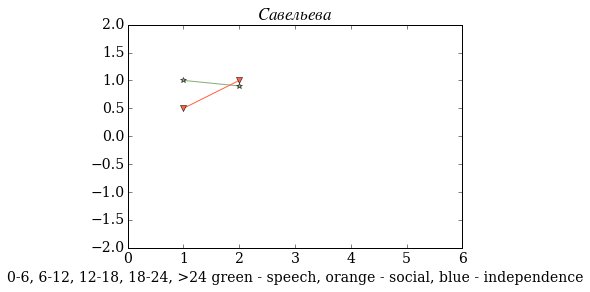

Козлов
{'ball_soc': 0.96, 'ball_spe': 0.9, 'fio': 'Козлов'}
{'ball_soc': 1.0, 'ball_spe': 0.71, 'ball_sam': 0.94, 'fio': 'Козлов'}
{'ball_soc': 0.86, 'ball_spe': 0.86, 'ball_sam': 0.95, 'fio': 'Козлов'}


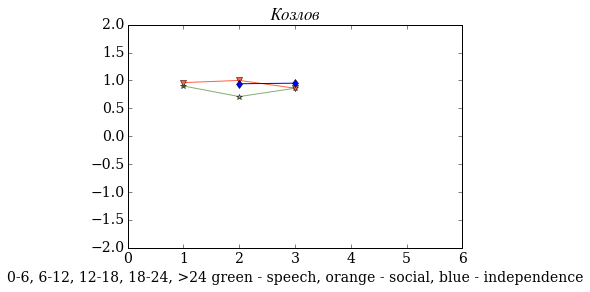

Коровин
{'ball_soc': 1.1, 'ball_spe': 0.78, 'fio': 'Коровин'}


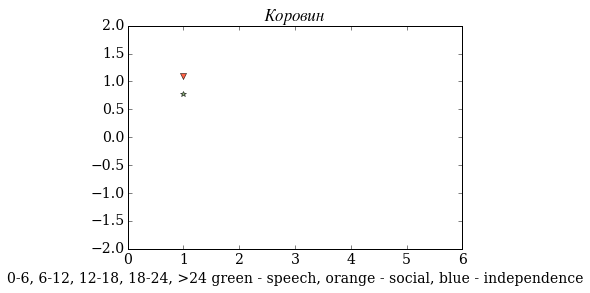

Казакова Д
{'ball_soc': 0.92, 'ball_spe': 1.0, 'fio': 'Казакова Д'}


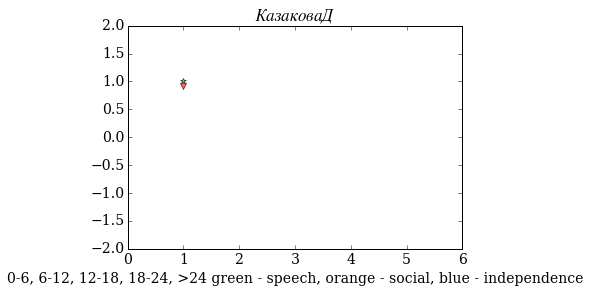

Крыков
{'ball_soc': 0.75, 'ball_spe': 0.34, 'fio': 'Крыков'}
{'ball_soc': 0.88, 'ball_spe': 0.62, 'fio': 'Крыков'}


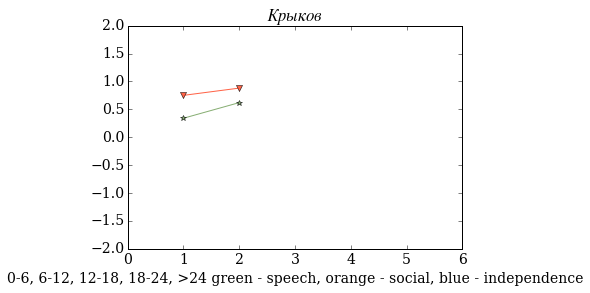

Чапарина 
{'ball_soc': 0.93, 'ball_spe': 0.93, 'ball_sam': 1.07, 'fio': 'Чапарина '}


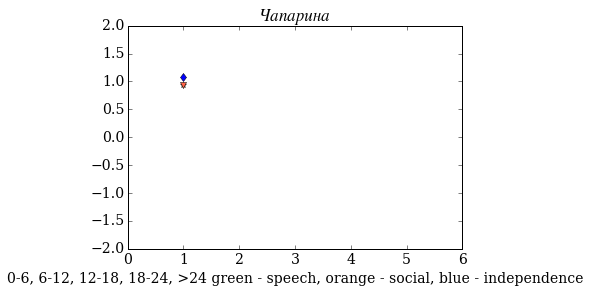

Давыдов С
{'ball_soc': 0.83, 'ball_spe': 0.87, 'ball_sam': 0.73, 'fio': 'Давыдов С'}
{'ball_soc': 0.79, 'ball_spe': 0.79, 'ball_sam': 1.0, 'fio': 'Давыдов С'}


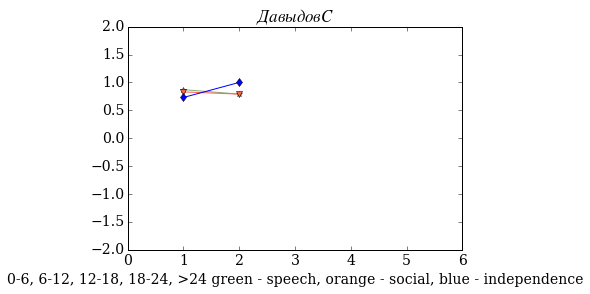

Лихачёв
{'ball_soc': 0.83, 'ball_spe': 0.67, 'fio': 'Лихачёв'}
{'ball_soc': 0.86, 'ball_spe': 0.76, 'fio': 'Лихачёв'}
{'ball_soc': 1.08, 'ball_spe': 0.69, 'ball_sam': 1.03, 'fio': 'Лихачёв'}
{'ball_soc': 0.95, 'ball_spe': 0.62, 'ball_sam': 1.0, 'fio': 'Лихачёв'}
{'ball_soc': 0.82, 'ball_spe': 0.65, 'ball_sam': 0.98, 'fio': 'Лихачёв'}


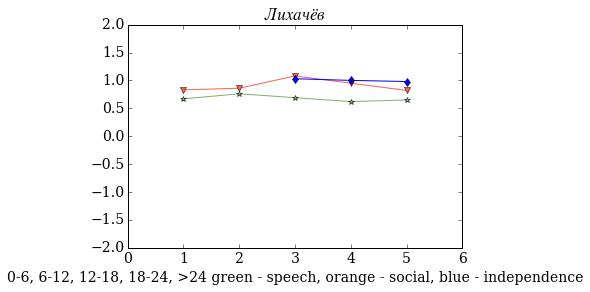

Афонина
{'ball_soc': 0.67, 'ball_spe': 0.6, 'fio': 'Афонина'}
{'ball_soc': 0.8, 'ball_spe': 0.73, 'ball_sam': 1.08, 'fio': 'Афонина'}
{'ball_soc': 0.93, 'ball_spe': 0.67, 'ball_sam': 1.27, 'fio': 'Афонина'}


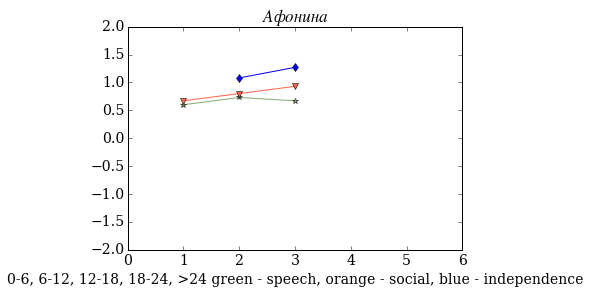

Колесова 
{'ball_soc': 0.0, 'ball_spe': 0.0, 'fio': 'Колесова '}


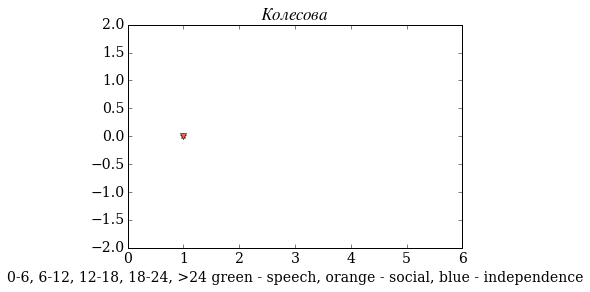

Сенцов
{'ball_soc': 0.89, 'ball_spe': 0.78, 'fio': 'Сенцов'}
{'ball_soc': 0.91, 'ball_spe': 0.75, 'ball_sam': 0.75, 'fio': 'Сенцов'}


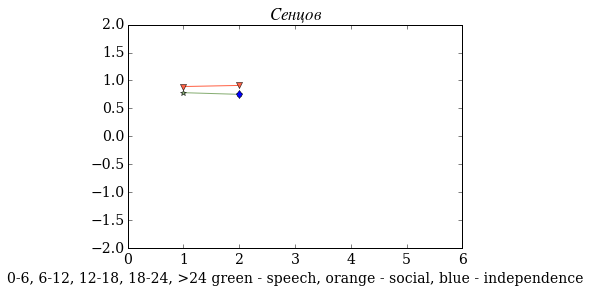

Лебеденко
{'ball_soc': 1.0, 'ball_spe': 0.9, 'fio': 'Лебеденко'}


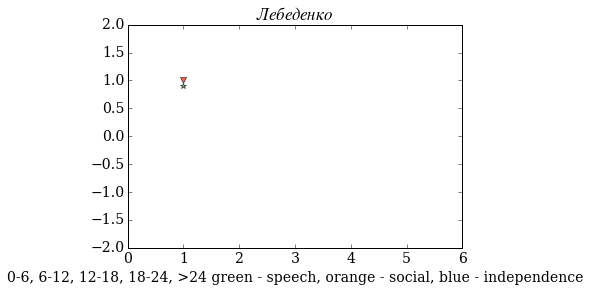

Артёмова
{'ball_soc': 1.11, 'ball_spe': 0.89, 'fio': 'Артёмова'}
{'ball_soc': 0.96, 'ball_spe': 0.98, 'ball_sam': 1.17, 'fio': 'Артёмова'}


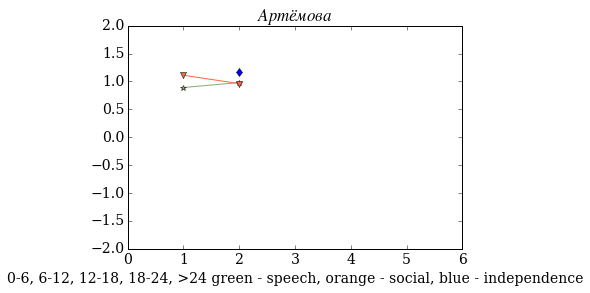

Сухотерина
{'ball_soc': 0.96, 'ball_spe': 0.75, 'ball_sam': 1.04, 'fio': 'Сухотерина'}


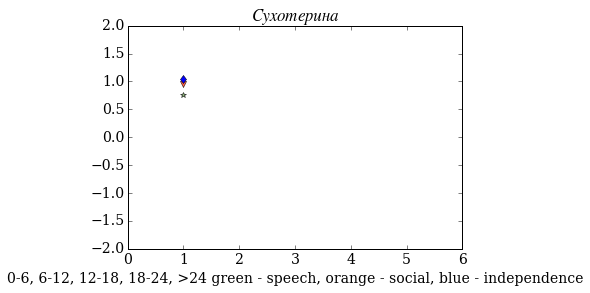

Кобелев
{'ball_soc': 0.87, 'ball_spe': 0.96, 'ball_sam': 0.91, 'fio': 'Кобелев'}


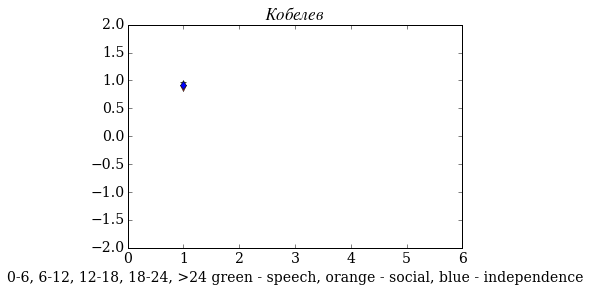

Иванова
{'ball_soc': 0.88, 'ball_spe': 0.92, 'ball_sam': 0.92, 'fio': 'Иванова'}


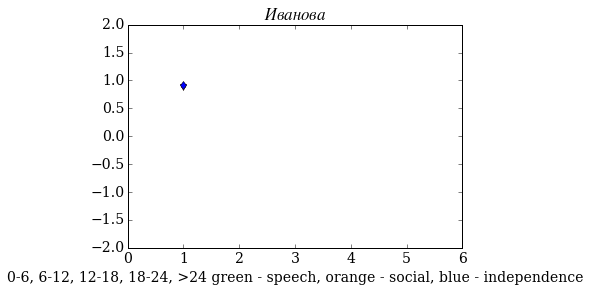

Степанов
{'ball_soc': 1.73, 'ball_spe': 0.82, 'fio': 'Степанов'}


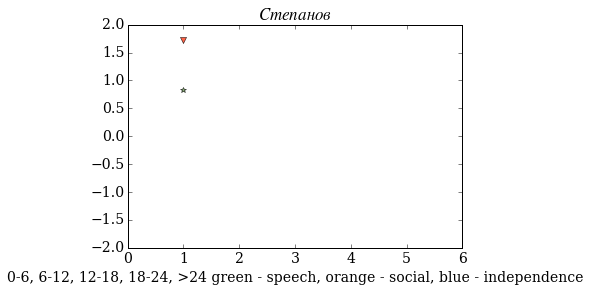

Горват
{'ball_soc': 1.5, 'ball_spe': 0.5, 'fio': 'Горват'}


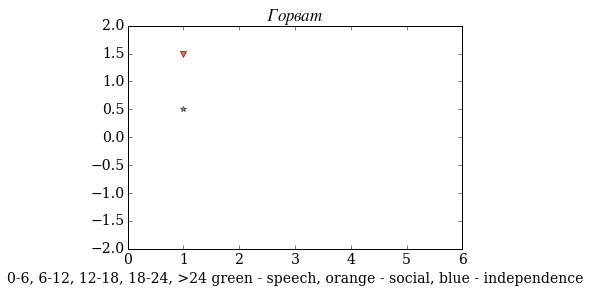

Козлова
{'ball_soc': 0.88, 'ball_spe': 0.71, 'ball_sam': 0.88, 'fio': 'Козлова'}


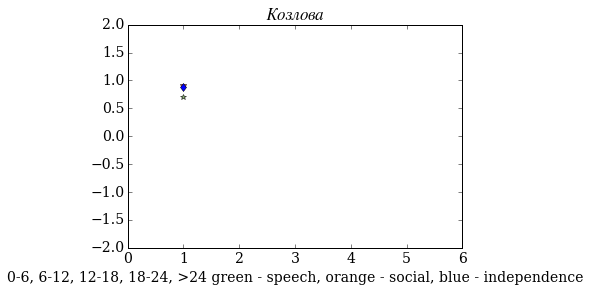

Смольянинов
{'ball_soc': 0.96, 'ball_spe': 0.62, 'fio': 'Смольянинов'}


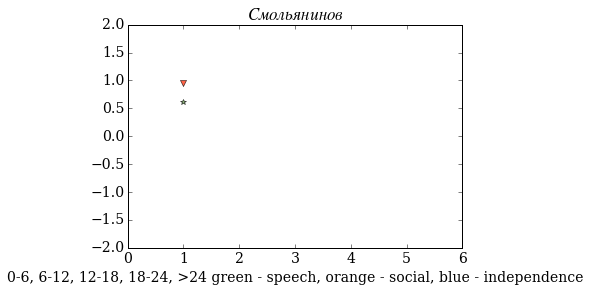

Брусников
{'ball_soc': 0.6, 'ball_spe': 0.76, 'ball_sam': 1.08, 'fio': 'Брусников'}
{'ball_soc': 0.78, 'ball_spe': 0.59, 'ball_sam': 0.77, 'fio': 'Брусников'}


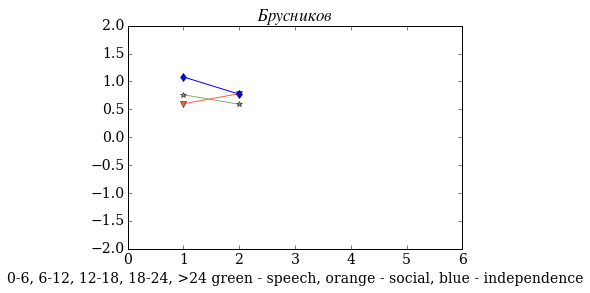

Кафитулина
{'ball_soc': 1.0, 'ball_spe': 0.5, 'fio': 'Кафитулина'}


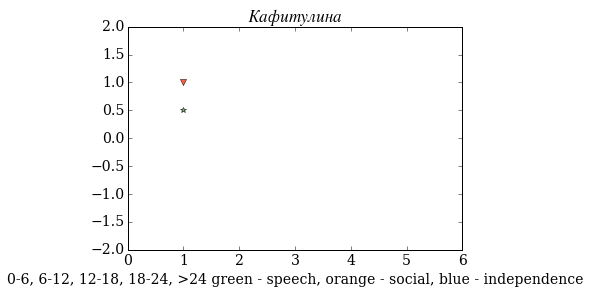

Березнев
{'ball_soc': 1.01, 'ball_spe': 0.98, 'ball_sam': 0.99, 'fio': 'Березнев'}


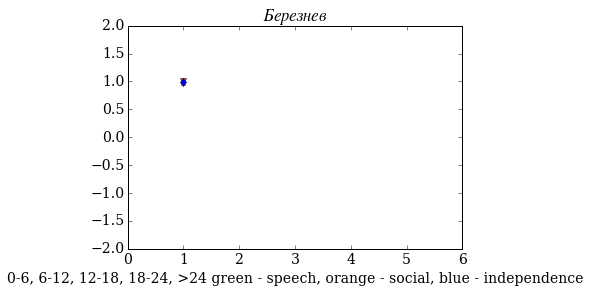

Дорофеева
{'ball_soc': 0.93, 'ball_spe': 0.83, 'ball_sam': 1.12, 'fio': 'Дорофеева'}
{'ball_soc': 0.92, 'ball_spe': 0.92, 'ball_sam': 1.0, 'fio': 'Дорофеева'}


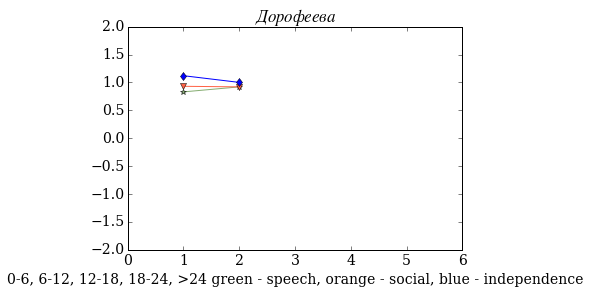

Торжков
{'ball_soc': 0.89, 'ball_spe': 0.56, 'fio': 'Торжков'}


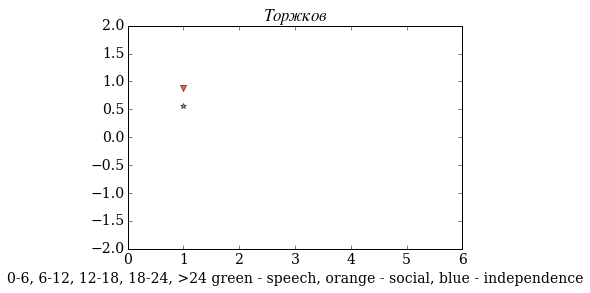

Иванов
{'ball_soc': 0.72, 'ball_spe': 0.53, 'ball_sam': 0.83, 'fio': 'Иванов'}


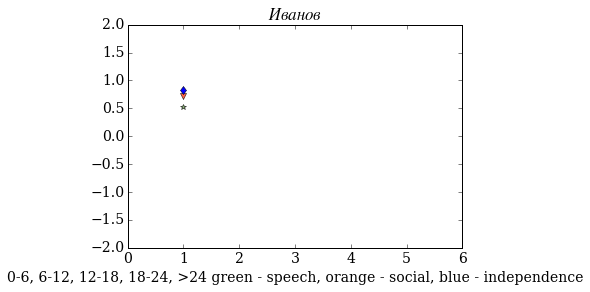

Аляев
{'ball_soc': 0.89, 'ball_spe': 0.89, 'ball_sam': 1.17, 'fio': 'Аляев'}
{'ball_soc': 0.93, 'ball_spe': 0.93, 'ball_sam': 0.93, 'fio': 'Аляев'}
{'ball_soc': 0.95, 'ball_spe': 0.86, 'ball_sam': 1.05, 'fio': 'Аляев'}


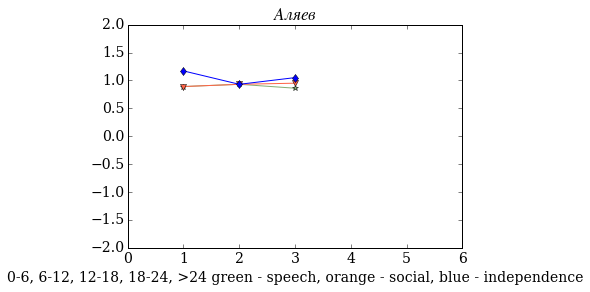

Соловьёва
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Соловьёва'}


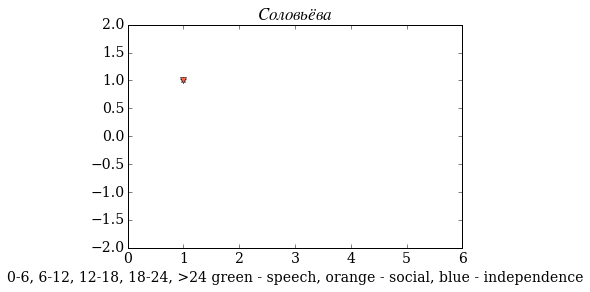

Усенко
{'ball_soc': 0.98, 'ball_spe': 0.76, 'ball_sam': 0.89, 'fio': 'Усенко'}


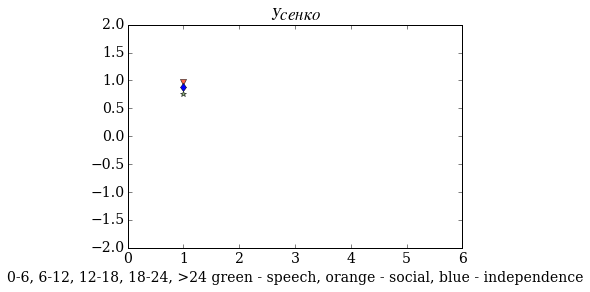

In [266]:
for item in fam:
    print(item)
    spe = list()
    sam = list()
    soc = list()
    items = list()
    spe.append(None)
    soc.append(None)
    sam.append(None)
    i = 0;
    for k in range(5):
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                spe.append(t['ball_spe'])
                try:
                    sam.append(t['ball_sam'])
                except:
                    sam.append(None)
                i = i + 1;
                soc.append(t['ball_soc'])
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(spe)), spe, color='sage', marker="*")
    ax.plot(range(len(soc)), soc, color = 'tomato', marker="v")
    ax.plot(range(len(sam)), sam, marker="d")
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 6))
    ax.set_xlabel('0-6, 6-12, 12-18, 18-24, >24 green - speech, orange - social, blue - independence')
    plt.savefig('3_pat_%s.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()

In [267]:
d1 = pandas.DataFrame(s[0])
d2 = pandas.DataFrame(s[1])
d3 = pandas.DataFrame(s[2])
d4 = pandas.DataFrame(s[3])
d5 = pandas.DataFrame(s[4])

d = pandas.concat([d1,d2,d3,d4])
d.describe()
writer = pandas.ExcelWriter('3_pat.xlsx')
d.to_excel(writer,'Sheet1')
writer.save()

In [268]:
def fil(data):
    up = [0,6,12,18,24]
    spe = list()
    soc = list()
    sam = list()
    l = {}
    for i in range(1,6):
        k = list()
        if i ==5:
            kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'речь') & (data['category'] > up[i-1])])
            kc1 = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'социальное ') & (data['category'] > up[i-1])])
            kc2 = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'самостоятельность') & (data['category'] > up[i-1])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1])])
        else:
            kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'речь')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            kc1 = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'социальное ')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            kc2 = pandas.DataFrame(data[(data['group']  == 'кг') & (data['sphere'] == 'самостоятельность')  & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
            #kc = pandas.DataFrame(data[(data['group']  == 'кг') & (data['category'] > up[i-1]) & (data['category'] <= up[i])])
        kc = kc[['fio','sphere','ball']].groupby(['fio']).mean()
        kc1 = kc1[['fio','sphere','ball']].groupby(['fio']).mean()
        kc2 = kc2[['fio','sphere','ball']].groupby(['fio']).mean()
        spe.append(kc)
        soc.append(kc1)
        sam.append(kc2)
        #kc2 = kc[['fio','sphere','ball']].groupby(['fio']).min()
        #l_min.append(kc2)
    l['spe'] = spe
    l['soc'] = soc
    l['sam'] = sam
    return l
d = fil(data)
print(d)

{'soc': [            ball
fio             
Грузнова    0.80
Зевакин     1.00
Котов       0.88
Селезенева  0.75
Трошин      1.00
Трусов      1.00,              ball
fio              
Зевакин     1.070
Кабирова    1.065
Котов       1.070
Селезенева  1.000,          ball
fio          
Суховей  0.97
Трусов   0.85,          ball
fio          
Рябкова     1,           ball
fio           
Зеникова  0.81], 'spe': [             ball
fio              
Грузнова    0.800
Зевакин     0.865
Котов       0.880
Селезенева  0.880
Трошин      1.000
Трусов      1.000,              ball
fio              
Зевакин     0.870
Кабирова    0.900
Котов       0.805
Селезенева  1.000,          ball
fio          
Суховей  0.90
Трусов   0.89,          ball
fio          
Рябкова  1.42,           ball
fio           
Зеникова   0.7], 'sam': [Empty DataFrame
Columns: [ball]
Index: [],           ball
fio           
Кабирова  1.22,          ball
fio          
Суховей  0.97
Трусов   0.89,          ball
fio          
Рябкова

In [269]:
s = list()
fam = {}
for i in range(0,5):
    fio = list()
    for item in d['spe'][i].iterrows():
        res = {}
        #print(item[0],item[1]['sphere'],item[1]['ball'])
        fam[item[0]] = 1
        res['fio'],res['ball_spe'] = item[0], float("{0:.2f}".format(item[1]['ball']))
        l = d['spe'][i].index == item[0]
        #print(l)
        k = numpy.where(l == True)
        #print(k[0])
        m = d['soc'][i].ix[k[0]]
        #1
        res['ball_soc'] = float("{0:.2f}".format(m['ball'][0]))
        try:
            #print(d['sam'][i].ix[k[0]])
            m = d['sam'][i].ix[k[0]]
            res['ball_sam'] = float("{0:.2f}".format(m['ball'][0]))
        except:
            rt = 0
            #res['ball_sam'] = -1
        #print('РАЗНОСТЬ', m['ball'] - item[1]['ball'])
        #t = m['ball'] - item[1]['ball']
        #res['diff'] = float("{0:.2f}".format(t[0]))
        fio.append(res)
    s.append(fio)
print(s)
print(fam)

[[{'ball_soc': 0.8, 'ball_spe': 0.8, 'fio': 'Грузнова'}, {'ball_soc': 1.0, 'ball_spe': 0.86, 'fio': 'Зевакин'}, {'ball_soc': 0.88, 'ball_spe': 0.88, 'fio': 'Котов'}, {'ball_soc': 0.75, 'ball_spe': 0.88, 'fio': 'Селезенева'}, {'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Трошин'}, {'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Трусов'}], [{'ball_soc': 1.07, 'ball_spe': 0.87, 'ball_sam': 1.22, 'fio': 'Зевакин'}, {'ball_soc': 1.06, 'ball_spe': 0.9, 'fio': 'Кабирова'}, {'ball_soc': 1.07, 'ball_spe': 0.8, 'fio': 'Котов'}, {'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Селезенева'}], [{'ball_soc': 0.97, 'ball_spe': 0.9, 'ball_sam': 0.97, 'fio': 'Суховей'}, {'ball_soc': 0.85, 'ball_spe': 0.89, 'ball_sam': 0.89, 'fio': 'Трусов'}], [{'ball_soc': 1.0, 'ball_spe': 1.42, 'ball_sam': 0.96, 'fio': 'Рябкова'}], [{'ball_soc': 0.81, 'ball_spe': 0.7, 'ball_sam': 0.96, 'fio': 'Зеникова'}]]
{'Трошин': 1, 'Кабирова': 1, 'Селезенева': 1, 'Зеникова': 1, 'Котов': 1, 'Грузнова': 1, 'Зевакин': 1, 'Трусов': 1, 'Суховей': 1

Трошин
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Трошин'}


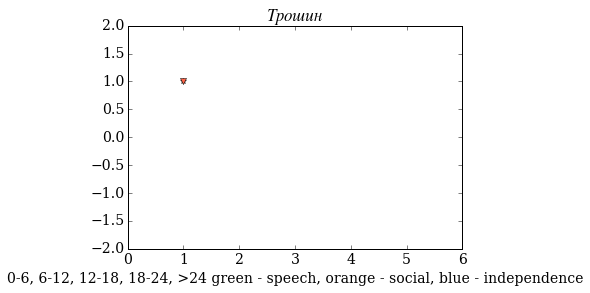

Кабирова
{'ball_soc': 1.06, 'ball_spe': 0.9, 'fio': 'Кабирова'}


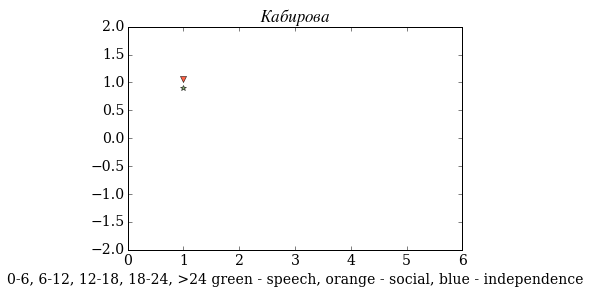

Селезенева
{'ball_soc': 0.75, 'ball_spe': 0.88, 'fio': 'Селезенева'}
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Селезенева'}


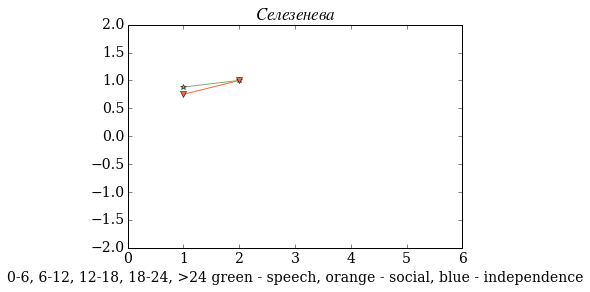

Зеникова
{'ball_soc': 0.81, 'ball_spe': 0.7, 'ball_sam': 0.96, 'fio': 'Зеникова'}


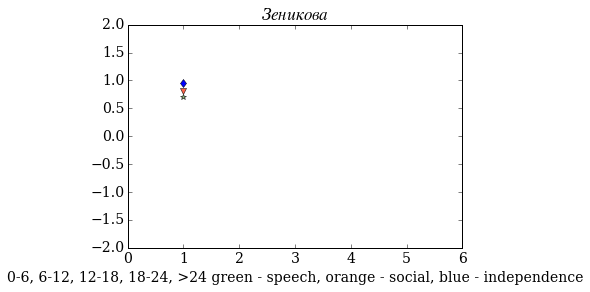

Котов
{'ball_soc': 0.88, 'ball_spe': 0.88, 'fio': 'Котов'}
{'ball_soc': 1.07, 'ball_spe': 0.8, 'fio': 'Котов'}


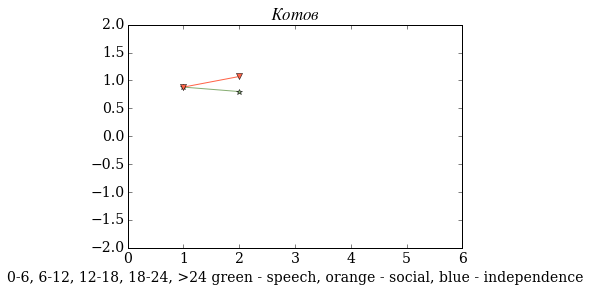

Грузнова
{'ball_soc': 0.8, 'ball_spe': 0.8, 'fio': 'Грузнова'}


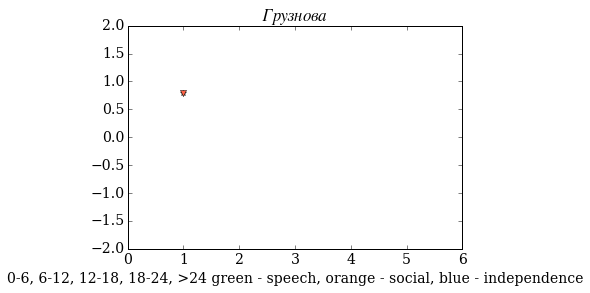

Зевакин
{'ball_soc': 1.0, 'ball_spe': 0.86, 'fio': 'Зевакин'}
{'ball_soc': 1.07, 'ball_spe': 0.87, 'ball_sam': 1.22, 'fio': 'Зевакин'}


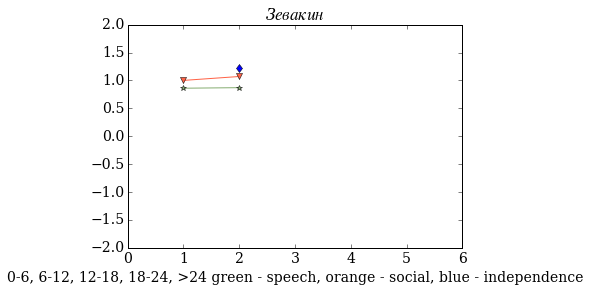

Трусов
{'ball_soc': 1.0, 'ball_spe': 1.0, 'fio': 'Трусов'}
{'ball_soc': 0.85, 'ball_spe': 0.89, 'ball_sam': 0.89, 'fio': 'Трусов'}


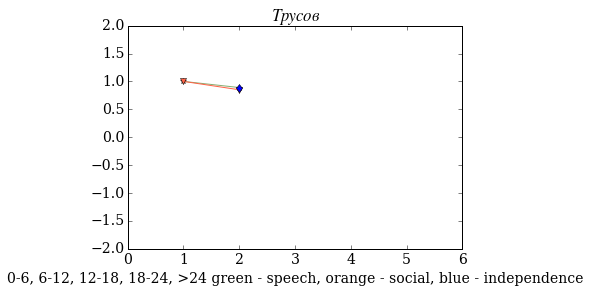

Суховей
{'ball_soc': 0.97, 'ball_spe': 0.9, 'ball_sam': 0.97, 'fio': 'Суховей'}


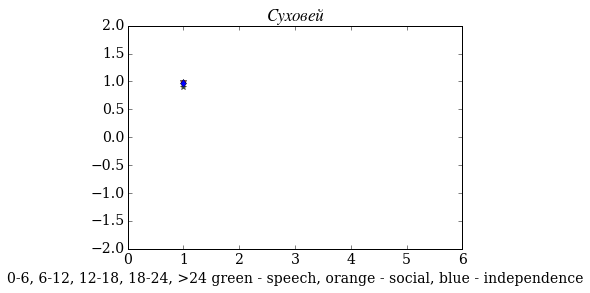

Рябкова
{'ball_soc': 1.0, 'ball_spe': 1.42, 'ball_sam': 0.96, 'fio': 'Рябкова'}


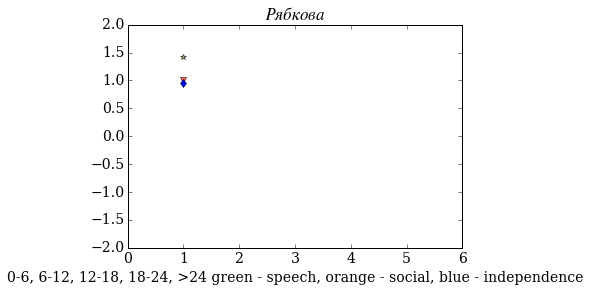

In [270]:
for item in fam:
    print(item)
    spe = list()
    sam = list()
    soc = list()
    items = list()
    spe.append(None)
    soc.append(None)
    sam.append(None)
    i = 0;
    for k in range(5):
        for t in s[k]:
            if t['fio'] == item:
                print(t)
                spe.append(t['ball_spe'])
                try:
                    sam.append(t['ball_sam'])
                except:
                    sam.append(None)
                i = i + 1;
                soc.append(t['ball_soc'])
    fig, ax = plt.subplots()
    ax.set_title('$%s$'%item)
    ax.plot(range(len(spe)), spe, color='sage', marker="*")
    ax.plot(range(len(soc)), soc, color = 'tomato', marker="v")
    ax.plot(range(len(sam)), sam, marker="d")
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 6))
    ax.set_xlabel('0-6, 6-12, 12-18, 18-24, >24 green - speech, orange - social, blue - independence')
    plt.savefig('3_norm_%s.png'%item, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()

In [271]:
d1 = pandas.DataFrame(s[0])
d2 = pandas.DataFrame(s[1])
d3 = pandas.DataFrame(s[2])
d4 = pandas.DataFrame(s[3])
d5 = pandas.DataFrame(s[4])

d = pandas.concat([d1,d2,d3,d4])
d.describe()
writer = pandas.ExcelWriter('3_norma.xlsx')
d.to_excel(writer,'Sheet1')
writer.save()